In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model,Model
import random
import math

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import copy
x_tmp = copy.deepcopy(x_test[0])

5


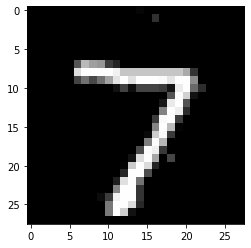

2


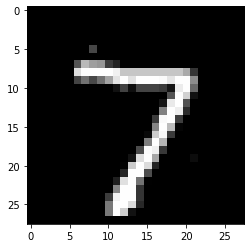

1


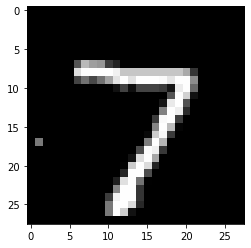

3


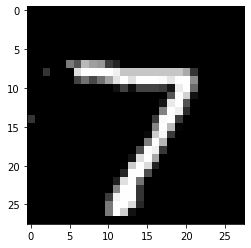

3


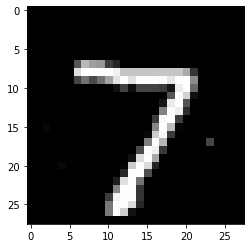

2


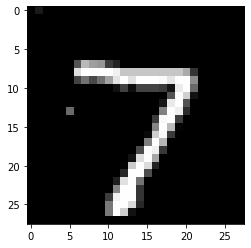

3


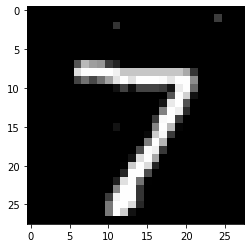

3


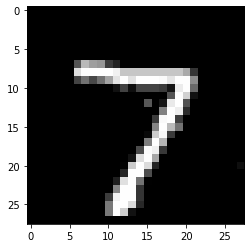

2


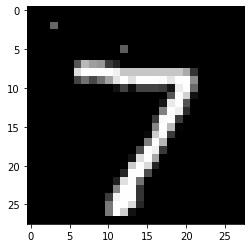

4


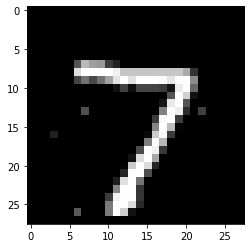

3


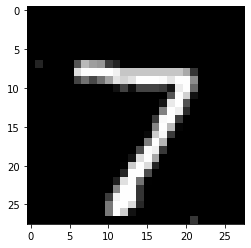

4


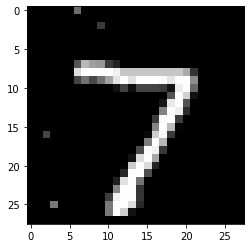

4


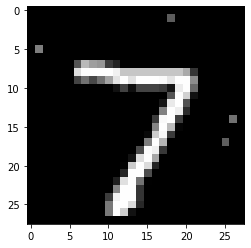

4


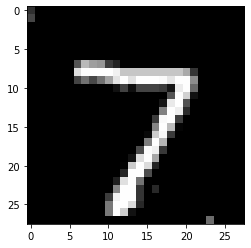

3


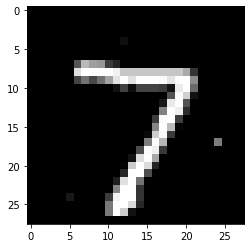

5


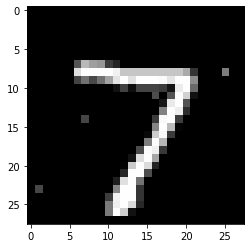

1


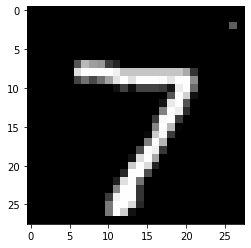

5


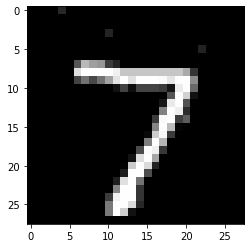

5


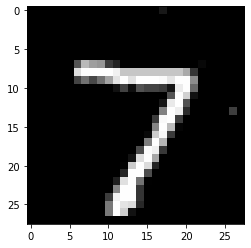

4


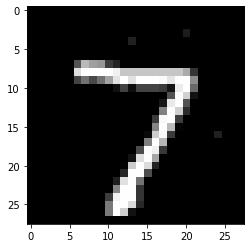

4


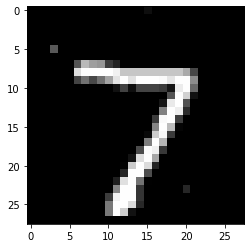

2


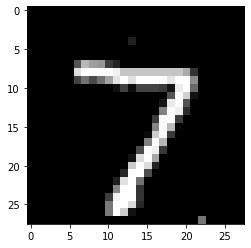

1


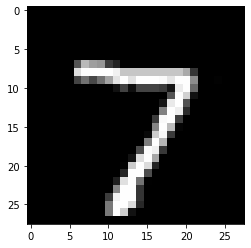

1


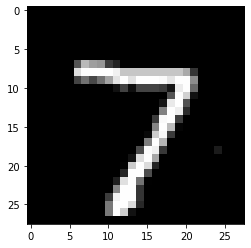

5


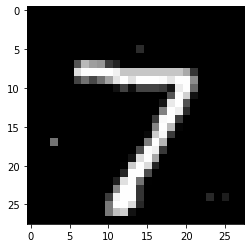

2


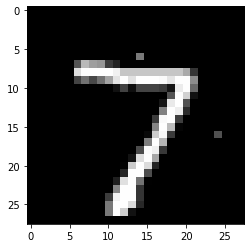

5


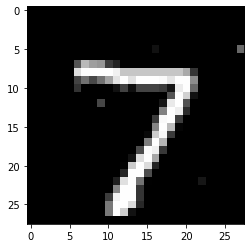

3


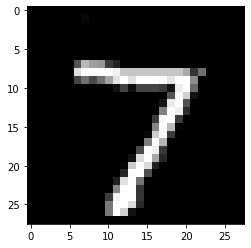

2


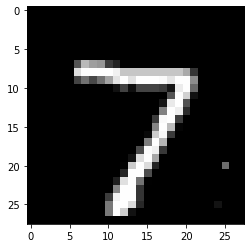

2


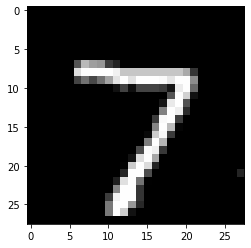

4


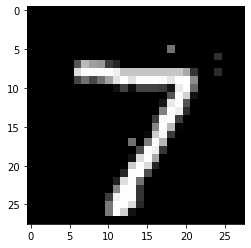

4


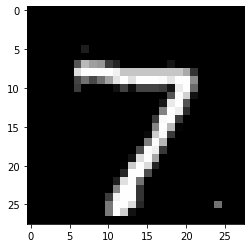

2


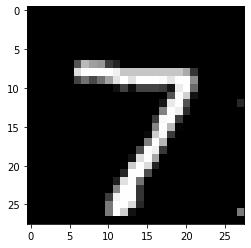

5


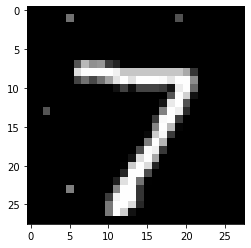

3


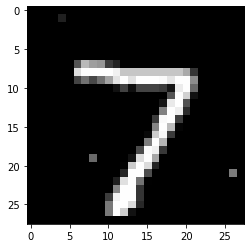

1


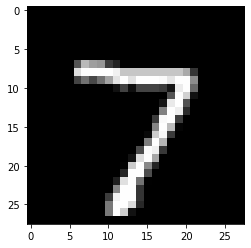

2


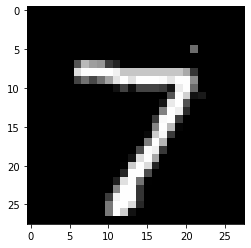

3


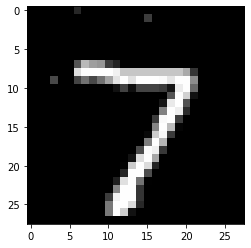

2


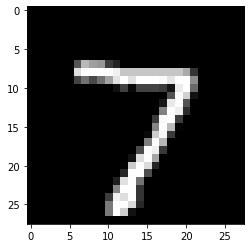

1


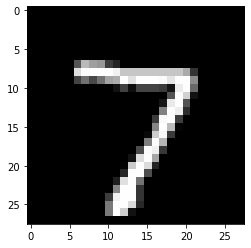

1


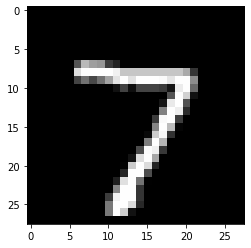

2


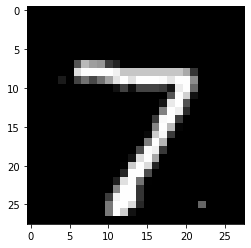

4


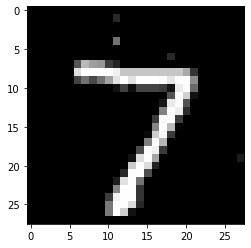

3


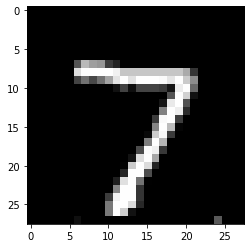

4


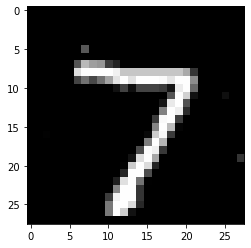

4


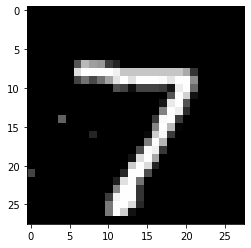

5


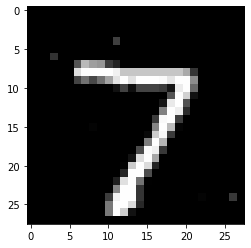

2


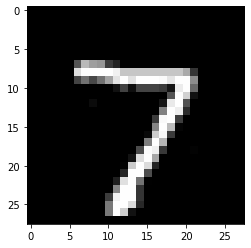

3


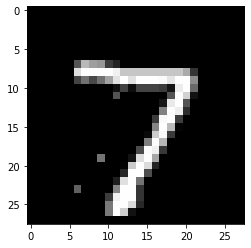

2


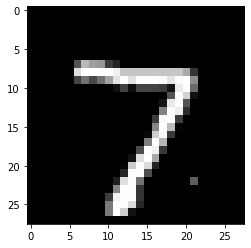

2


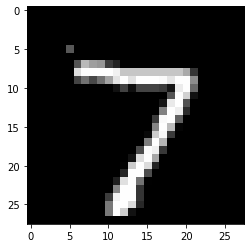

1


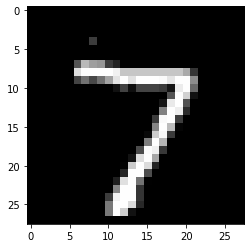

3


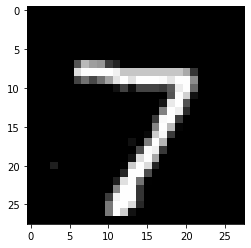

1


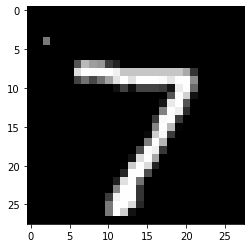

2


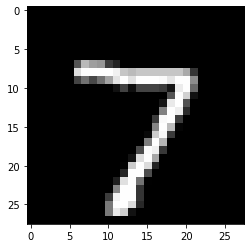

2


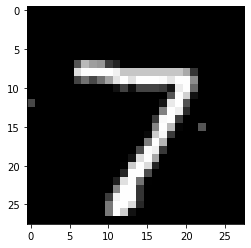

2


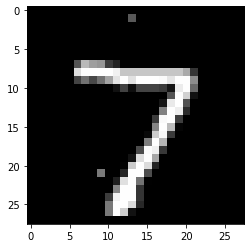

4


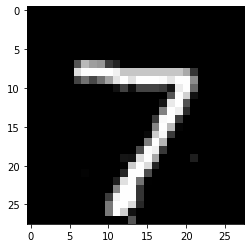

2


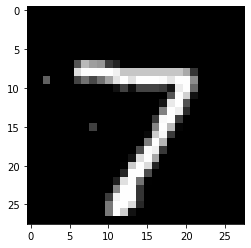

1


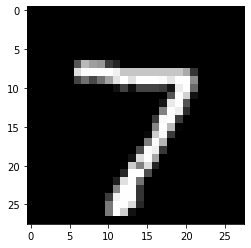

4


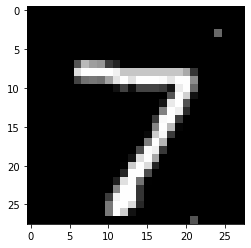

1


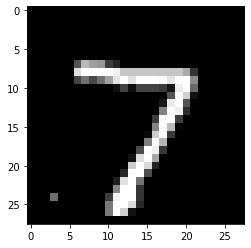

1


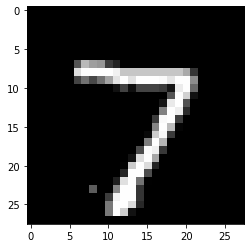

5


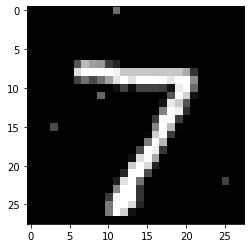

5


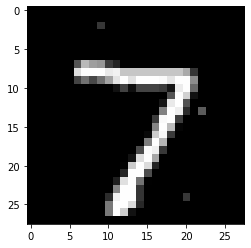

4


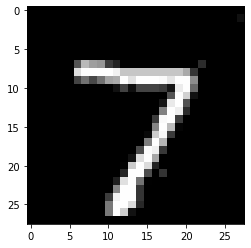

4


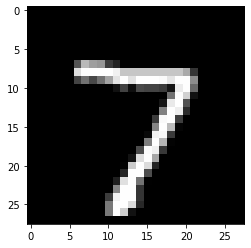

1


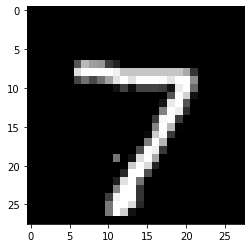

1


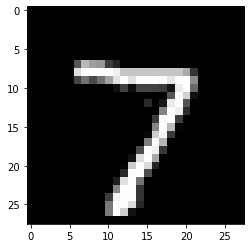

3


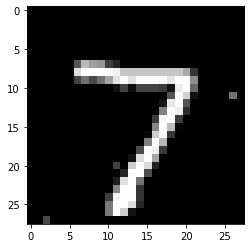

4


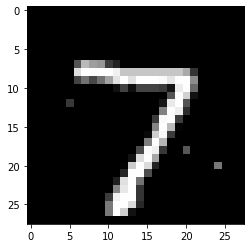

4


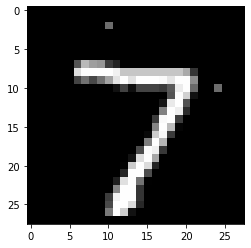

5


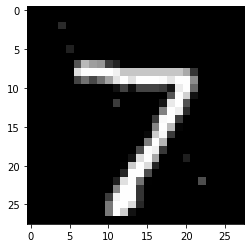

5


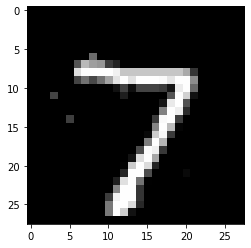

1


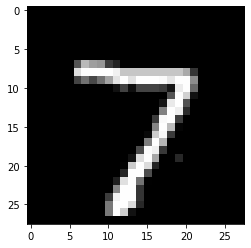

2


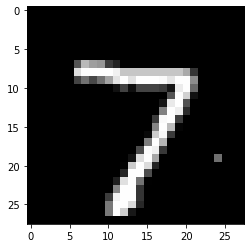

2


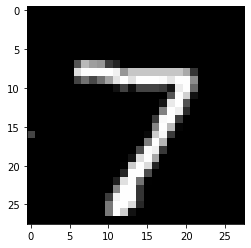

5


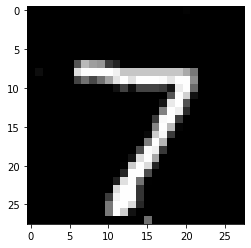

3


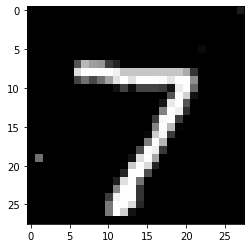

3


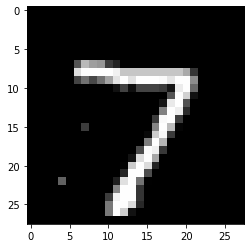

1


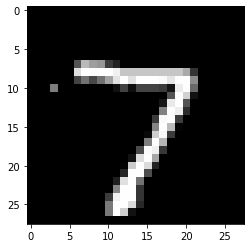

2


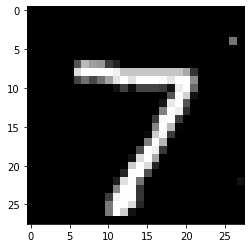

3


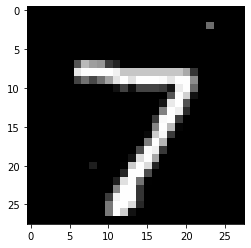

2


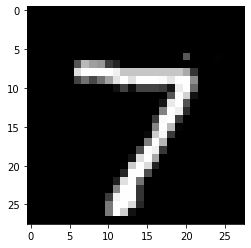

1


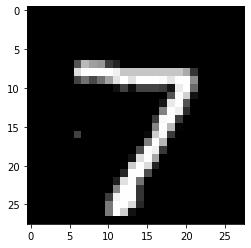

1


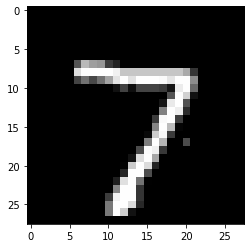

4


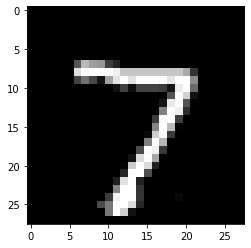

5


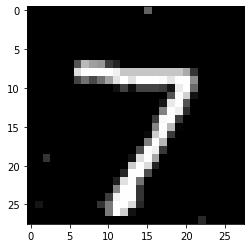

4


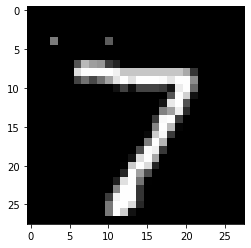

3


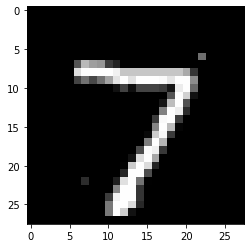

5


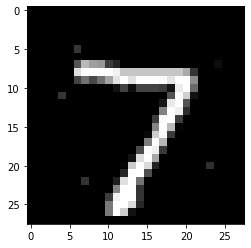

1


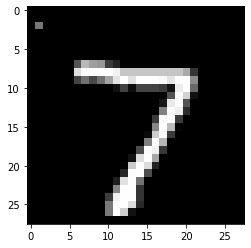

4


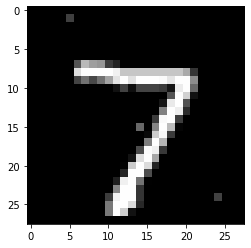

5


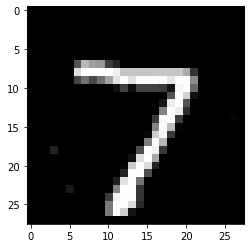

1


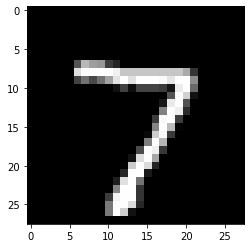

1


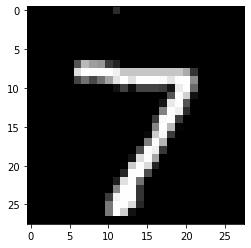

1


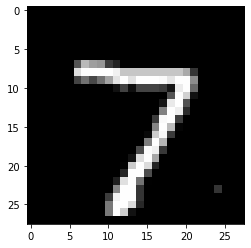

4


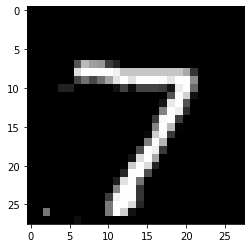

5


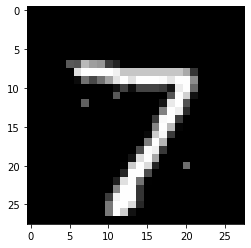

4


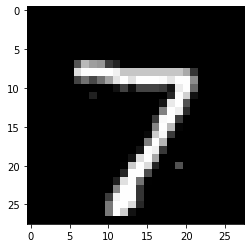

In [4]:
#产生扰动种群（强度50%）
x_des = []
for r in range(100):
    x = []
    y = []
    L = random.randint(1,5)
    for i in range(L):
        x.append(random.randint(0,27))
        y.append(random.randint(0,27))
        #if x_test[0][x[i],y[i]] == 0:
        if x_test[0][x[i],y[i]] <= 127:
            x_tmp[x[i],y[i]] = random.randint(0,127)
        #elif x_test[0][x[i],y[i]] != 0:
        elif x_test[0][x[i],y[i]] > 127:
            x_tmp[x[i],y[i]] = random.randint(127,254)
    x_t = x_tmp/255-x_test[0]/255
    #x_des.append(np.array (x_t.reshape(1,784)))
    x_des.append(np.array(x_t.reshape(1,784)))
    print(L)
    plt.imshow(x_tmp,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_test[0])

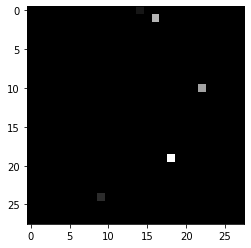

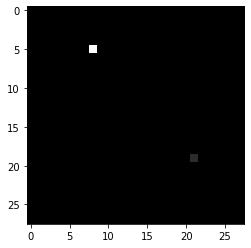

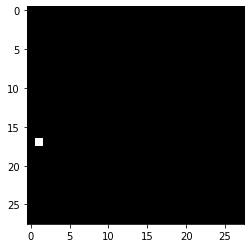

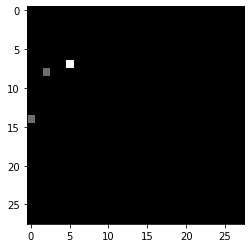

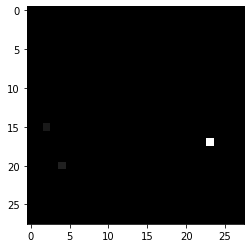

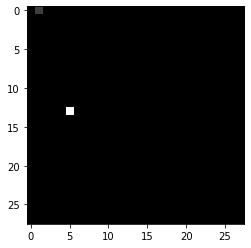

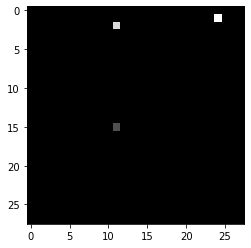

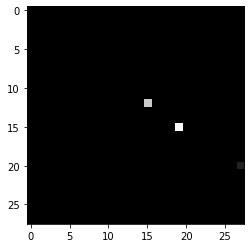

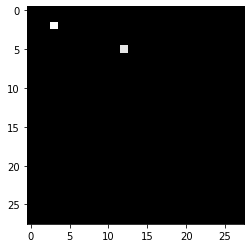

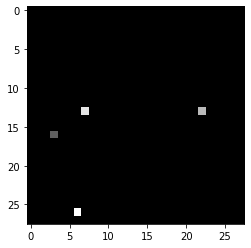

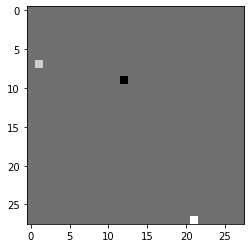

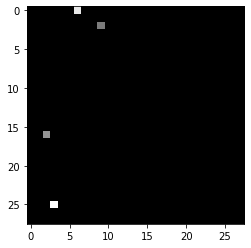

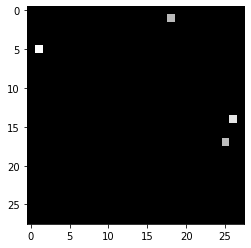

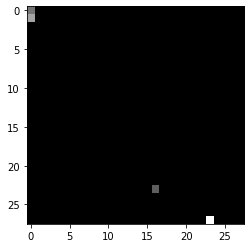

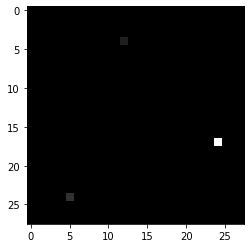

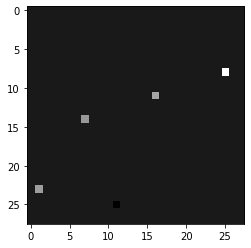

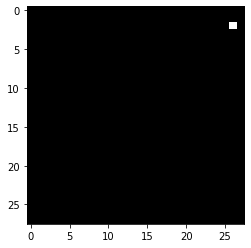

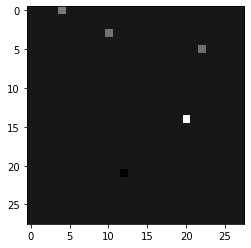

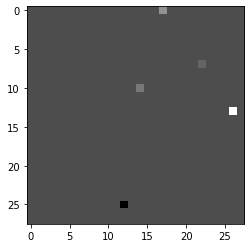

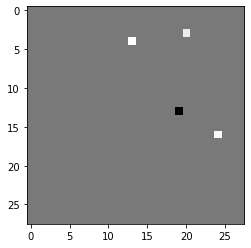

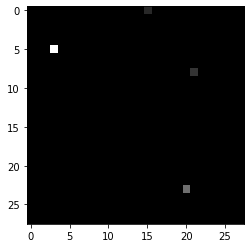

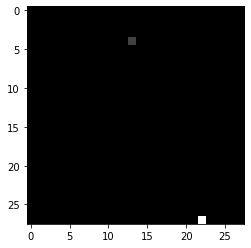

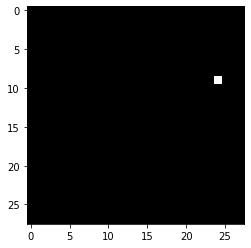

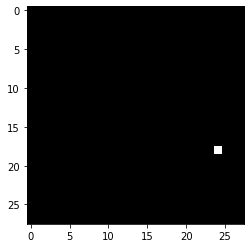

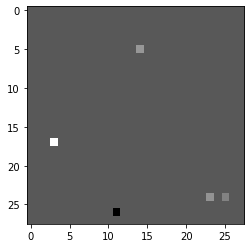

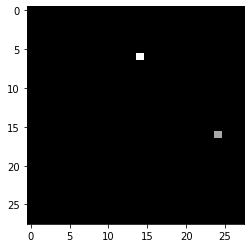

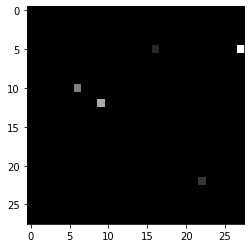

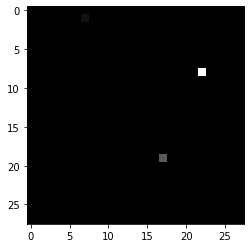

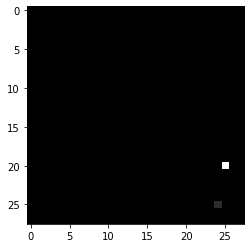

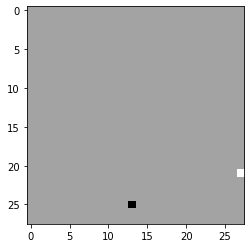

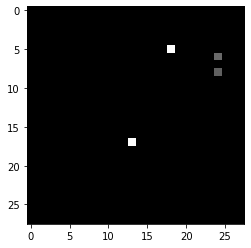

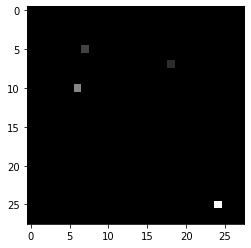

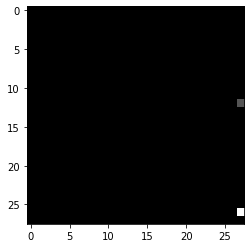

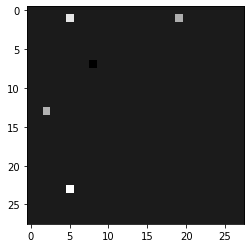

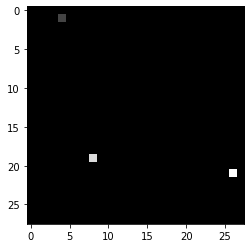

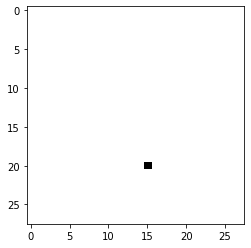

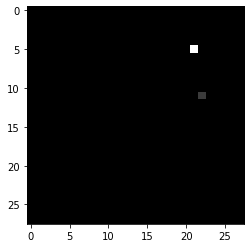

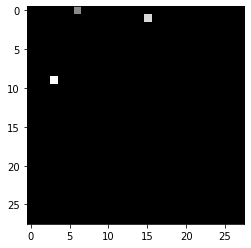

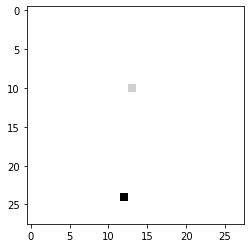

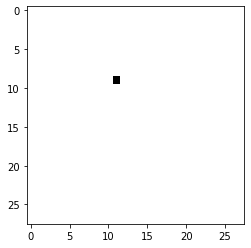

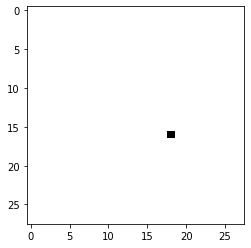

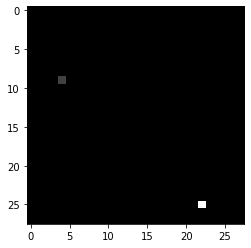

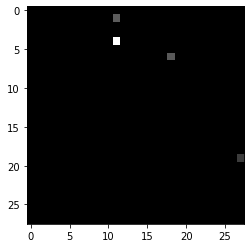

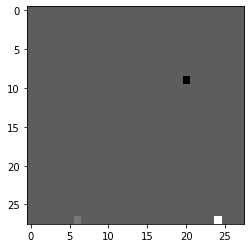

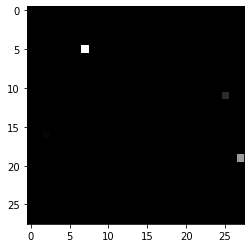

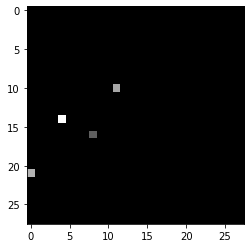

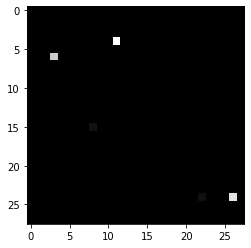

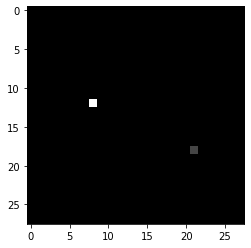

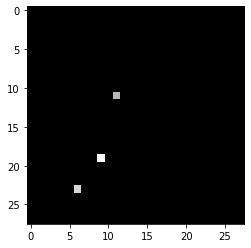

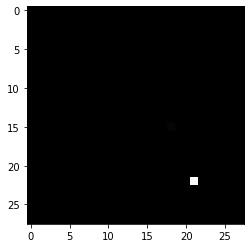

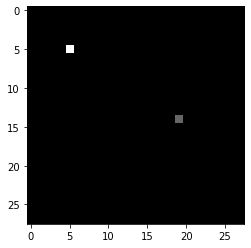

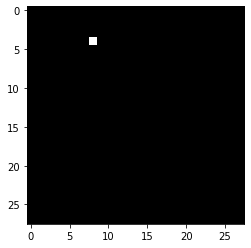

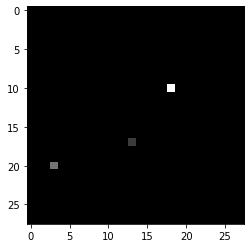

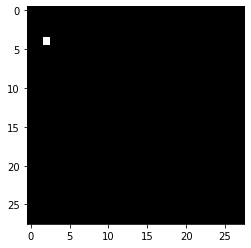

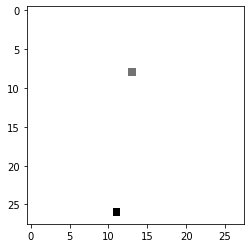

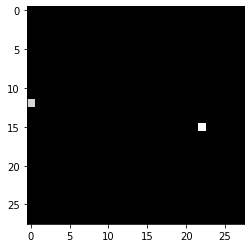

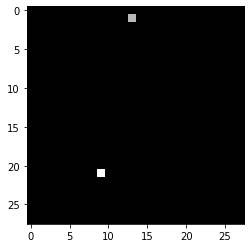

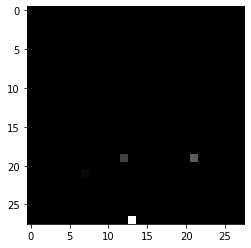

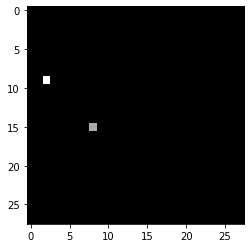

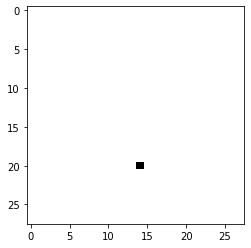

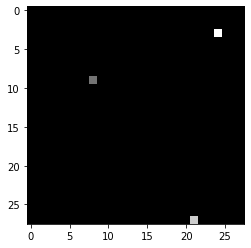

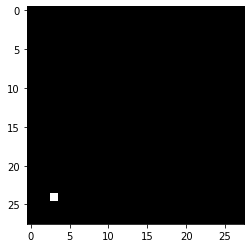

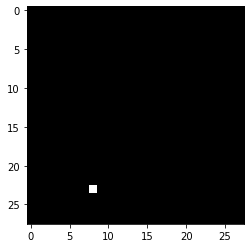

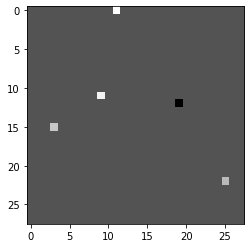

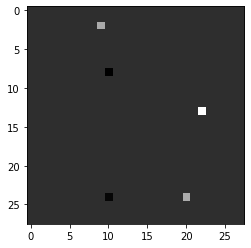

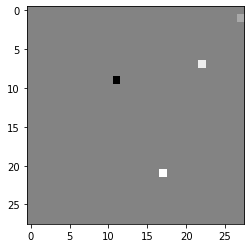

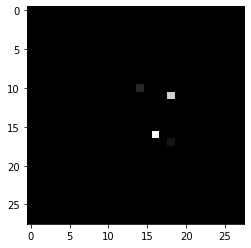

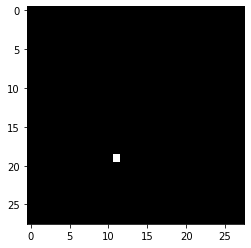

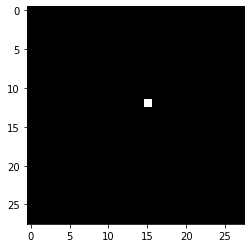

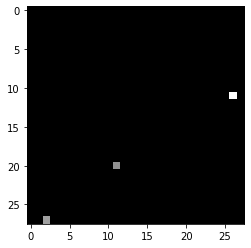

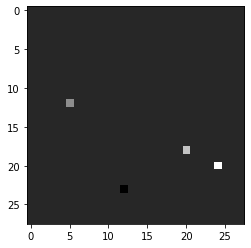

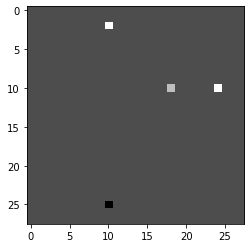

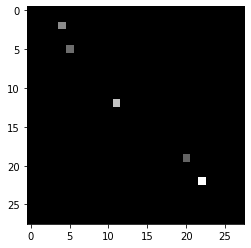

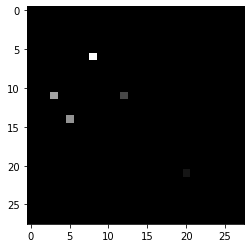

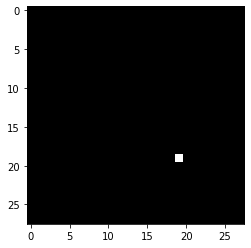

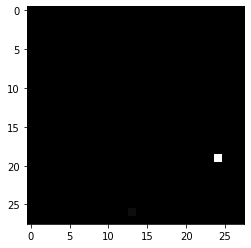

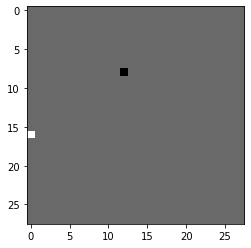

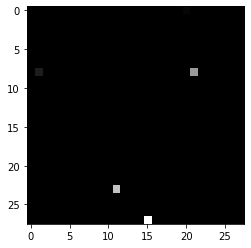

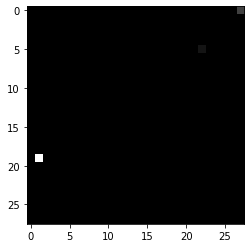

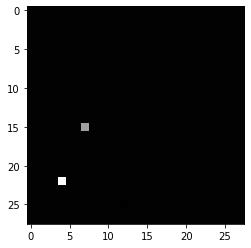

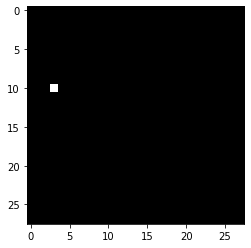

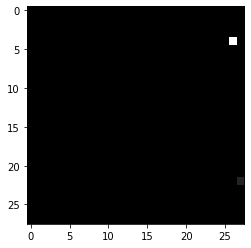

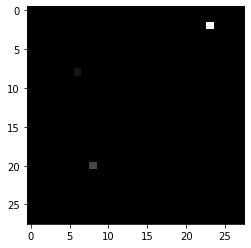

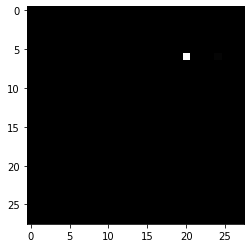

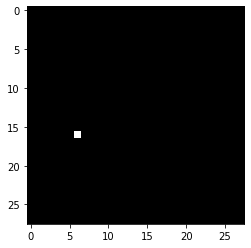

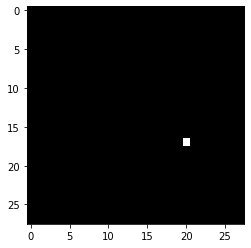

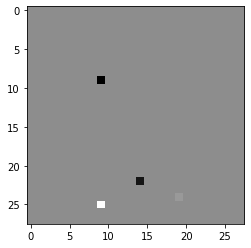

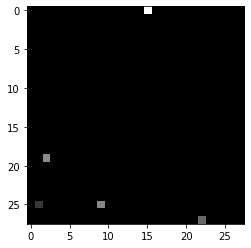

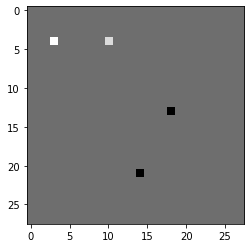

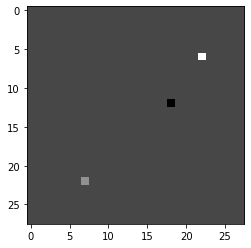

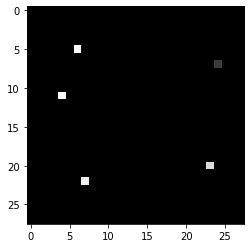

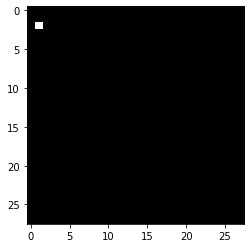

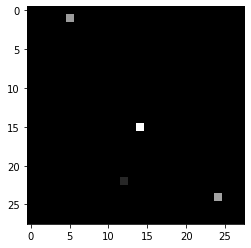

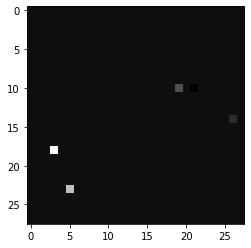

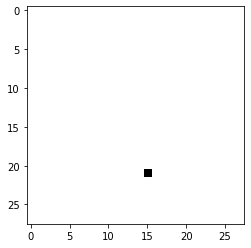

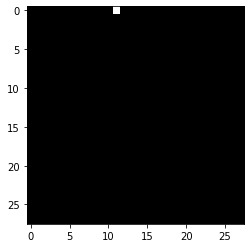

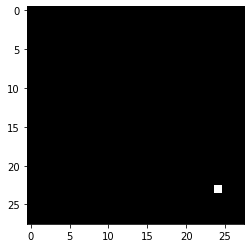

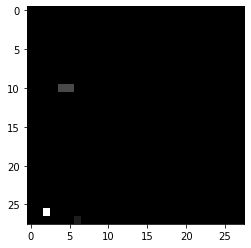

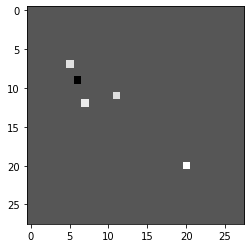

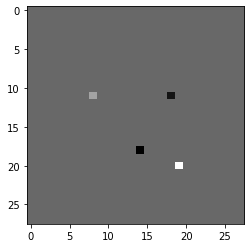

In [5]:
# test
for i in range(100):
    Xr = x_des[i].reshape(28,28)
    plt.imshow(Xr,cmap='gray')
    plt.show()

In [17]:
x_des[5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.2       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.27843137,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [6]:
x_train = x_train.reshape(60000,784)    # 将图片摊平，变成向量

In [7]:
x_test = x_test.reshape(10000,784)     # 对测试集进行同样的处理

In [8]:
x_train = x_train / 255
x_test = x_test / 255 

In [9]:
model = load_model('mnist_model.h5')

In [21]:
# test
X = np.concatenate(x_des, axis=0)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
# test
X = np.array(x_des)
X[9] 

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [10]:
#test
x_test[0].shape

(784,)

In [10]:
def Func(x):
    x_F = x[:]+x_test[0]
    result=model.predict(x_F.reshape(1,784))
    return result[0][7]

In [12]:
MAX_GENERATION = 2000  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 100  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
E = 0.3
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:
            if Func(BEST_X) < E:
                print(GENERATION)
                BEST = BEST_X + x_test[0]
                print(BEST)
                plt.imshow(BEST.reshape(28,28),cmap='gray')
                plt.show()
                break
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])   # [-(0.5+SIGMA),0.5+SIGMA]
                for j in range(784):
                    if x_test[0][j] == 0:
                        if V[i, j] > 0.5:
                            V[i, j] = 0.5-(V[i, j]-0.5)
                            print(V[i, j],"1")
                        elif V[i, j] < 0:
                            V[i, j] = 0
                            #print(V[i, j],"2")
                    elif x_test[0][j] != 0:
                        if V[i, j] + x_test[0][j] > 1:
                            # V +t = 1-(V+t-1)
                            V[i, j] = 1-(V[i, j]+2*x_test[0][j]-1)
                            print(V[i, j],"3")
                        elif V[i, j] + x_test[0][j] < 0:
                            if x_test[0][j] <= 0.5:
                                V[i, j] = -x_test[0][j] 
                                print(V[i, j],"4")
                            elif x_test[0][j] > 0.5:
                                print(V[i, j],"5——")
                                V[i, j] = -x_test[0][j]+5.00000000e-01
                                print(V[i, j],"5")
                    
                    #print(V[i, j])
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                # 变异的种子表现更好
                if FITS[i] >= FITS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    if FITS_U[i] < Func(BEST_X):
                        BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X))
        if GENERATION == MAX_GENERATION:
            print("当前次未能收敛")
        G[k] = GENERATION
       
print("代数：", G)
print("平均代数：", np.mean(G))

0.46157254901960787 1
-0.15800392156862753 3
-0.15800392156862753 3
0.46157254901960787 1
0.46157254901960787 1
-0.047003921568627316 3
0.46157254901960787 1
-0.0692117647058823 3
-0.07181568627451007 3
-0.02088627450980418 3
-0.1149098039215688 3
-0.1149098039215688 3
-0.02088627450980418 3
-0.060062745098039105 3
-0.018274509803921646 3
-0.08235294117647059 4
-0.027415686274509632 3
-0.027415686274509632 3
-0.1149098039215688 3
-0.1149098039215688 3
最优值： 0.99650264
-0.030421827450980654 3
-0.018274509803921646 3
0.4039215686274509 1
-0.15800392156862753 3
-0.15800392156862753 3
-0.08235294117647059 4
-0.047003921568627316 3
0.4039215686274509 1
-0.018274509803921646 3
-0.06666666666666667 4
-0.010439215686274483 3
-0.030421827450980654 3
-0.08235294117647059 4
0.4039215686274509 1
0.4039215686274509 1
-0.03394509803921553 3
-0.08235294117647059 4
0.367478431372549 1
0.3847237921568627 1
-0.060062745098039105 3
-0.1149098039215688 3
-0.1149098039215688 3
0.4039215686274509 1
0.4039215

0.3803781187921569 1
0.3803781187921569 1
0.4200963490196079 1
0.367478431372549 1
0.0017577254901959272 3
-0.010439215686274483 3
-0.027415686274509632 3
0.3847237921568627 1
0.367478431372549 1
0.367478431372549 1
0.49465441568627455 1
0.4728722784313726 1
0.3847237921568627 1
-0.0012862862745097736 3
0.3936156862745098 1
0.0017551137254900873 3
0.43082174232156867 1
-0.0692117647058823 3
0.49363699215686274 1
0.367478431372549 1
-0.018274509803921646 3
0.4039215686274509 1
0.36225098039215686 1
0.3847237921568627 1
0.367478431372549 1
0.3847237921568627 1
0.3936156862745098 1
0.367478431372549 1
-0.07181568627451007 3
0.49465441568627455 1
0.367478431372549 1
0.3847237921568627 1
-0.060062745098039105 3
0.367478431372549 1
-0.028739850980392223 3
-0.07181568627451007 3
-0.030421827450980654 3
0.3803781187921569 1
0.3847237921568627 1
-0.018274509803921646 3
0.367478431372549 1
最优值： 0.99555594
0.36225098039215686 1
0.403921568627451 1
0.38920757630288627 1
0.367478431372549 1
0.38472

0.0017577254901959272 3
0.4458901960784314 1
-0.010439215686274483 3
0.4728722784313726 1
0.43597986666666677 1
0.36802372736078426 1
0.13787142352941184 3
-0.07181568627451007 3
0.4402439039963255 1
0.4728722784313726 1
-0.0078091686274510685 3
0.4167820901960785 1
0.4200963490196079 1
0.4458901960784314 1
0.13787142352941184 3
0.367478431372549 1
0.4009390509803922 1
0.367478431372549 1
0.43597986666666677 1
0.36802372736078426 1
0.4167820901960785 1
0.36225098039215686 1
-0.02304751764705859 3
0.43597986666666677 1
-0.0078091686274510685 3
0.4458901960784314 1
0.36225098039215686 1
0.367478431372549 1
0.4167820901960785 1
0.4200963490196079 1
0.4167820901960785 1
0.13787142352941184 3
0.4200963490196079 1
0.4167820901960785 1
0.367478431372549 1
-0.047003921568627316 3
0.4274575034431374 1
0.4458901960784314 1
0.4828805568627451 1
-0.02304751764705859 3
0.46941024222734906 1
0.3832724764156863 1
0.4167820901960785 1
0.36225098039215686 1
0.367478431372549 1
0.367478431372549 1
0.400

0.4872441325921568 1
-0.007674823376470741 3
0.4828805568627451 1
0.415303756862745 1
-0.030421827450980654 3
0.38898760257240395 1
0.4009390509803922 1
0.4680200820154392 1
0.36225098039215686 1
0.367478431372549 1
0.4828805568627451 1
0.3847237921568627 1
0.3867990901960784 1
0.48984874901960784 1
0.36225098039215686 1
-0.016071486274509716 3
0.4250666666666666 1
-0.030421827450980654 3
0.415303756862745 1
0.4728722784313726 1
0.4828805568627451 1
0.4250666666666666 1
0.48474088030196083 1
0.3953992054039216 1
0.4865350078737686 1
0.3867990901960784 1
0.48984874901960784 1
0.3847237921568627 1
0.36225098039215686 1
0.4200963490196079 1
0.3783309325921569 1
0.4009390509803922 1
0.3804839826156863 1
0.3867990901960784 1
0.367478431372549 1
0.3847237921568627 1
0.4250666666666666 1
0.3953992054039216 1
0.4250666666666666 1
0.0017551137254900873 3
0.4850910825686273 1
0.4250666666666666 1
0.48296157890980385 1
0.36225098039215686 1
-0.08187621176470605 3
0.367478431372549 1
0.42506666666

最优值： 0.99396497
0.47485059215686276 1
0.3527382502392157 1
0.46851585098039217 1
0.4265329450980392 1
-0.01042093333333316 3
0.3655239693686274 1
0.4458901960784314 1
0.4274509803921569 1
-0.01042093333333316 3
0.4145969818745099 1
0.491985231372549 1
0.4265329450980392 1
0.49212365490196075 1
0.36225098039215686 1
0.367478431372549 1
0.49008192819387575 1
0.4009390509803922 1
0.45739312434534507 1
0.491985231372549 1
0.4458901960784314 1
0.4358322901960784 1
0.36225098039215686 1
0.488973634290196 1
-0.023047517647059035 3
0.4458901960784314 1
0.367478431372549 1
0.4458901960784314 1
0.47485059215686276 1
0.46804430980392153 1
0.4330984919333334 1
0.3698065230509804 1
0.49212365490196075 1
0.36225098039215686 1
-0.030421827450980654 3
0.403921568627451 1
0.4828805568627451 1
0.41175926183519207 1
0.47393255686274505 1
0.46804430980392153 1
-0.00012043238039227688 3
0.4148068967378784 1
0.36225098039215686 1
0.4274509803921569 1
0.37513410789803925 1
-0.00012043238039227688 3
-0.023047

0.4828805568627451 1
-0.012157756862745117 3
0.3855981118549019 1
-0.014769521568627653 3
-0.007674823376470297 3
0.4274509803921569 1
-0.007674823376470741 3
0.36225098039215686 1
0.4330984919333334 1
-0.023047517647059035 3
0.4728722784313726 1
-0.002555716184364787 3
0.36225098039215686 1
0.37191887525098033 1
0.4265329450980392 1
0.40652682686604313 1
-0.002287331286274785 3
0.367478431372549 1
0.47443921568627445 1
0.40822774714901966 1
-0.002287331286274785 3
0.3855981118549019 1
-0.002287331286274785 3
0.3607694020156862 1
-0.027415686274509632 3
0.47485059215686276 1
0.48984874901960784 1
0.4103164745098039 1
0.4828805568627451 1
0.0010861147379370717 3
0.367478431372549 1
0.36225098039215686 1
0.4265329450980392 1
-0.060062745098039105 3
0.3655260156862745 1
0.4892191994720959 1
0.4828805568627451 1
-0.018683250980392252 3
-0.060062745098039105 3
0.3627443459915215 1
-0.027415686274509632 3
0.367478431372549 1
-0.018683250980392252 3
最优值： 0.9935842
0.3967398341731726 1
0.49489

最优值： 0.99338734
-0.1149098039215688 3
0.4943207940627451 1
0.46851585098039217 1
0.49826682630787456 1
0.48984874901960784 1
-0.008395648809874423 3
0.48139897848627444 1
-0.007689828581074476 3
0.4250666666666666 1
-0.0019372492871059244 3
-0.016071486274509716 3
0.4250666666666666 1
0.4902780129613934 1
0.00296027560799228 3
0.46851585098039217 1
-0.0031570489333332397 3
0.4250666666666666 1
-0.0965834937319685 3
0.48644180058493725 1
0.4295142509803921 1
0.36225098039215686 1
0.46851585098039217 1
-0.004899095992156877 3
-0.07181568627451007 3
0.3867990901960784 1
0.4902780129613934 1
0.4828805568627451 1
0.46487046032609936 1
0.4250666666666666 1
0.38500019794901963 1
0.4754551757656784 1
0.3607694020156862 1
-0.0031570489333332397 3
0.001080018884337175 3
-0.0031570489333332397 3
0.4943989073483961 1
0.3762014289333333 1
-0.0031570489333332397 3
0.3756274734974039 1
-0.0031570489333332397 3
-0.0012862862745097736 3
0.3984371137254902 1
0.38116819812181557 1
0.3867990901960784 1
-0

最优值： 0.99189925
0.47266942762540043 1
0.39979516078431365 1
0.36703442745098036 1
0.4862821277740407 1
0.48950808736026463 1
0.40407058823529407 1
0.4828805568627451 1
0.45490196078431366 1
0.40407058823529407 1
0.4750550999098039 1
-0.2627450980392157 4
0.4753102901960784 1
0.39979516078431365 1
0.36225098039215686 1
0.0017551137254900873 3
0.4878977425110509 1
-0.2627450980392157 4
0.49203157049803914 1
0.0 3
0.45490196078431366 1
0.4866668048893352 1
0.49212365490196075 1
0.36225098039215686 1
-0.024391404891586088 3
0.36225098039215686 1
0.0036917835902194884 3
0.44210847559555877 1
0.42173387450980393 1
-0.2627450980392157 4
0.36225098039215686 1
0.49212365490196075 1
0.38973725490196065 1
0.4657486942745098 1
0.4416643933019607 1
0.4745098039215686 1
0.4926921586328755 1
0.36225098039215686 1
0.47304723095593726 1
0.36225098039215686 1
0.39979516078431365 1
0.357960898932698 1
0.4570446629402336 1
0.36225098039215686 1
0.4415852718028712 1
0.4430265108896765 1
0.49148627450980387

0.4921080168313725 1
0.3691159568627451 1
-0.2627450980392157 4
0.49042612265438235 1
0.46729157744798433 1
0.48891797239215684 1
0.49212365490196075 1
-0.2627450980392157 4
0.4970817099990572 1
0.42709864011850784 1
0.40407058823529407 1
-0.0025969507686274262 3
0.4808446942745098 1
0.0026309193960785127 3
0.4616979344784313 1
0.40407058823529407 1
0.48891797239215684 1
0.46851585098039217 1
0.4753102901960784 1
0.40407058823529407 1
0.40407058823529407 1
0.37931873201589017 1
0.47464205193673525 1
-0.0078091686274510685 3
0.4817975619163266 1
0.4828805568627451 1
0.39979516078431365 1
0.40475740392156856 1
0.459027703133316 1
0.3607694020156862 1
0.44210847559555877 1
0.36225098039215686 1
0.47067058823529406 1
-0.2627450980392157 4
0.0017612017490196141 3
0.46844910953970165 1
0.43768716717399925 1
0.4921080168313725 1
0.40407058823529407 1
-0.2627450980392157 4
0.36225098039215686 1
0.4773333333333334 1
0.45490196078431366 1
0.36225098039215686 1
0.40407058823529407 1
0.49148627450

0.4796090431423191 1
0.39313361165838756 1
0.40407058823529407 1
-0.2627450980392157 4
0.0023795066726335357 3
0.3977634603000745 1
-0.2627450980392157 4
-0.004661743848075162 3
0.40407058823529407 1
0.40407058823529407 1
0.39704241375891614 1
0.0004947333733384962 3
0.36225098039215686 1
0.484650369971788 1
0.35453066488119556 1
0.40407058823529407 1
-0.037450086274509964 3
0.4942005623882526 1
0.3974716719132463 1
0.49483784475796055 1
0.48139897848627444 1
-0.00432638430980381 3
0.36225098039215686 1
0.40886644722652554 1
0.4839167447974423 1
0.40407058823529407 1
0.002924886572548857 3
0.46851585098039217 1
0.43810423414901967 1
0.3661479192530157 1
0.49550191372549024 1
-0.2627450980392157 4
0.4154630745098039 1
0.39221557636426985 1
0.48031794094658975 1
0.36225098039215686 1
0.0017551137254900873 3
0.41769590473725493 1
0.4812039237760346 1
0.4970399866354587 1
0.47913631157021364 1
0.4388119526106484 1
-0.012157756862745117 3
0.35592564983728625 1
0.4867252078431372 1
-0.262745

最优值： 0.99143726
0.4274509803921569 1
-0.0145879100619557 3
-0.0078091686274510685 3
-0.007674823376470297 3
0.49573258969160783 1
-0.07181568627451007 3
0.42988518807843135 1
0.485762818012034 1
-0.08951323431798519 3
0.40407058823529407 1
-0.014769521568627653 3
-0.002540971165278183 3
0.46470868266666665 1
0.45937222719215687 1
0.40407058823529407 1
0.4903940450078431 1
-0.0129501325847321 3
0.4299199767843137 1
-0.010439215686274483 3
0.463165835098982 1
-0.007674823376470297 3
0.3626620215408273 1
0.4941028597013942 1
0.0005060130673490981 3
-0.060062745098039105 3
0.4308764682348295 1
0.0005060130673490981 3
0.4265329450980392 1
-0.007674823376470297 3
0.44984914611753957 1
-0.005119107192105954 3
0.4684689035289471 1
0.4670342726039216 1
-0.07250558469149215 3
0.40407058823529407 1
0.4897689454230253 1
0.4992142920701236 1
0.4009390509803922 1
0.46614771180421455 1
0.40407058823529407 1
-0.0078091686274510685 3
0.4530892549019607 1
0.375213205256149 1
-0.002555716184364787 3
0.49

0.4887392488004647 1
0.4009390509803922 1
-0.03786625308131164 3
0.0023425577464020186 3
0.4861889331804926 1
0.4799174001098039 1
-0.00432638430980381 3
-0.06850229289244103 3
0.46533402842725635 1
-0.061740772628052554 3
-0.2627450980392157 4
0.4850226415773843 1
0.4828805568627451 1
0.48483029777534525 1
-0.2627450980392157 4
-0.007697870894117997 3
0.35707043764752344 1
-0.2627450980392157 4
0.36225098039215686 1
0.0 3
0.0026309193960785127 3
0.49934964557980166 1
-0.005783884103992332 3
0.48695275143783423 1
-0.0031570489333332397 3
0.46533402842725635 1
-0.011285717939286233 3
0.0 3
-0.009469889604077242 3
-0.0078091686274510685 3
0.47446917738439154 1
0.0005060130673490981 3
-0.2627450980392157 4
-0.002287331286274785 3
-0.005768813639215775 3
0.0005060130673490981 3
0.46533402842725635 1
0.0005170132535372574 3
-0.007424364857609778 3
0.4647485785181117 1
-0.009929640944280393 3
0.49455385300339005 1
0.48591028934207503 1
-0.061740772628052554 3
0.415303756862745 1
-0.006317475

最优值： 0.99053735
0.4250270540552934 1
0.46851585098039217 1
0.000820604103004996 3
0.4238033130082346 1
0.45364449411764707 1
-0.025546765099082158 3
-0.0145879100619557 3
-0.007674823376470297 3
0.415303756862745 1
0.39276773545582755 1
-0.015743508797286143 3
0.4708 1
-0.005119107192105954 3
0.36714055130980394 1
0.4183856705882353 1
-0.002555716184364787 3
-0.05249254288530514 3
0.40407058823529407 1
-0.0008510534893932942 3
0.39037987173333344 1
0.48025812213443053 1
0.40883751065882357 1
-0.01216181409818029 3
0.4708 1
-0.009260433415827496 3
0.002924886572548857 3
0.0038417523778779827 3
0.002924886572548857 3
-0.025966154650010953 3
0.48582495817554516 1
-0.014769521568627653 3
-0.0017123375183478728 3
-0.002555716184364787 3
0.4814168482039216 1
0.4289899646639086 1
-0.004717423085456751 3
0.48139897848627444 1
-0.05249254288530514 3
-0.0017046626949714927 3
0.3627443459915215 1
0.49511191512961306 1
0.45138155408627456 1
-0.016407299045851254 3
-0.003898050980392309 3
-0.035576

0.4847719778172781 1
-0.012662115918464778 3
0.40024709411764703 1
0.4249803921568627 1
0.4406153343457333 1
0.4774832138605427 1
-0.005119107192105954 3
0.45688598403921565 1
0.477806245427451 1
0.47164846559057794 1
0.00018161150667195258 3
-0.002555716184364787 3
-0.009955174146311752 3
-0.2627450980392157 4
0.003377107051070416 3
-0.003406769673758081 3
0.49901084313725486 1
-0.004422826429968829 3
-0.003406769673758081 3
0.3936156862745098 1
0.42710898039215683 1
0.4859957188643369 1
-0.2627450980392157 4
-0.00957037037647046 3
0.0018193889838955535 3
-0.010439215686274483 3
0.46436513892412723 1
0.4324368116579441 1
-0.006256006304254935 3
0.4488519019607843 1
0.4354706588235294 1
0.47891482285183873 1
0.42710898039215683 1
0.4009390509803922 1
-0.027706606827015978 3
0.47635527917744325 1
0.4354706588235294 1
0.46751054613603915 1
-0.023047517647059035 3
0.4765894895843137 1
0.4354706588235294 1
-0.002555716184364787 3
0.49901084313725486 1
0.3492781479435192 1
-0.26274509803921

-0.07940290010222428 3
0.40407058823529407 1
0.40905151345098034 1
0.43452227139389754 1
0.426033699506873 1
0.39179099431748265 1
0.40407058823529407 1
0.40407058823529407 1
0.378834139219443 1
0.3995599713062663 1
0.001979920307594085 3
-0.0007244265221704183 3
0.40407058823529407 1
0.0033409498368512924 3
0.4229722554108468 1
0.48971662758039214 1
0.40407058823529407 1
0.47359915798369023 1
-0.025588191922655046 3
0.45875287058823533 1
0.39538556381804435 1
0.00032433774714335506 3
0.41047128180392156 1
0.4061190257387052 1
0.40407058823529407 1
-0.023950414445431445 3
0.4561771641568627 1
0.47393255686274505 1
0.45875287058823533 1
-0.010439215686274483 3
0.00272398314500788 3
0.4943058598604666 1
0.40905151345098034 1
0.47671126433279176 1
0.46246237562119996 1
0.41660743370087083 1
0.42694553848959294 1
0.40407058823529407 1
0.4912688044281055 1
0.41176463527058826 1
0.000820604103004996 3
0.4515816674301568 1
0.45364449411764707 1
0.4183856705882353 1
0.47048231763529413 1
-0.00

-0.011285717939286233 3
0.49877892890616693 1
-0.0039470859325949625 3
-0.005970160681499248 3
0.4722676858567564 1
0.4990072963333333 1
-0.023047517647059035 3
0.46121181151758717 1
0.3823443360418185 1
0.49255876047450986 1
0.43864056929945106 1
0.43124705883529413 1
-0.011285717939286233 3
0.4195176117882353 1
0.4370212210325042 1
0.408309252924556 1
0.0007895532430861607 3
-0.00937948607144179 3
0.4195176117882353 1
0.391750470065343 1
0.357426972629729 1
0.43834061877898045 1
0.48858542663772975 1
-0.0017046626949714927 3
0.4047712737463137 1
0.0010754343313579273 3
-0.002563391007741167 3
0.40820818730204433 1
0.0011527762564298438 3
-0.010439215686274483 3
-0.002555716184364787 3
0.4947398871083568 1
0.471825999347696 1
-0.00283911699633288 3
0.49023037256449287 1
0.44659260784313726 1
0.49277565719874517 1
0.42352930588235294 1
-0.011285717939286233 3
0.4195176117882353 1
0.0032722885204861107 3
0.4955227451146811 1
0.48139897848627444 1
0.4231982454340393 1
0.4964230781108375 

最优值： 0.98780173
0.48525270673174115 1
0.002924886572548857 3
0.36909488047339345 1
0.4928570197439194 1
0.40785872940391765 1
0.37176300463163436 1
-0.036764768005492776 3
0.4995346463078476 1
-0.00804596883972275 3
-0.00460512881568631 3
0.4448657952235294 1
-0.2627450980392157 4
0.48412157130112143 1
0.0007417291954099348 3
0.3792745098039215 1
-0.001405092487845483 3
0.4970435658829825 1
0.40785872940391765 1
0.40433183409444373 1
0.44705882352941173 1
0.003891819324813639 3
0.4195176117882353 1
0.44705882352941173 1
0.4195176117882353 1
0.3832724764156863 1
0.0007203725958528917 3
0.373885633690479 1
0.49346205021726197 1
-0.2627450980392157 4
0.49562884848348454 1
0.4394597405276023 1
0.4667051977491453 1
0.49915251958970286 1
0.38457882641298036 1
0.4752053071033997 1
0.4195176117882353 1
0.414371758938745 1
-0.018422880462670044 3
0.39814403616753824 1
-0.2627450980392157 4
0.47602452670046547 1
0.3833488064582141 1
0.4613514020599684 1
0.48013594726445963 1
0.4907013191937445 1

-0.2627450980392157 4
-0.0025751539199196927 3
0.49383192629483497 1
-0.036764768005492776 3
-0.2627450980392157 4
0.41176463527058815 1
0.4533480048609734 1
0.4519165387679379 1
-0.0129501325847321 3
0.49300411631809693 1
0.47577998904286267 1
-0.011114310527427396 3
0.49425071898729245 1
0.4871603858483552 1
0.37184160495956853 1
0.4959360956020642 1
0.47975550588235294 1
0.49812384757020844 1
0.41967607554780395 1
-0.010317350257032842 3
0.4822326258887162 1
0.3778633379713019 1
0.002924886572548857 3
0.4936363770415523 1
0.37184160495956853 1
-0.2627450980392157 4
0.4015736161136022 1
0.4279834923475164 1
-0.003898050980392309 3
-0.07181568627451007 3
0.43636232199595515 1
0.357667927950027 1
0.4910771820980392 1
0.0011403131035319092 3
0.4442618865648682 1
-0.00722268844502727 3
0.49445956529007273 1
0.49705478842750894 1
0.4620164125027757 1
-0.012223141178144825 3
0.4989257828551513 1
0.4935172680638612 1
0.00179937655596496 3
-0.02266330535010619 3
0.45875287058823533 1
0.44722

0.3472704787615405 1
-0.2627450980392157 4
0.4238706176773077 1
0.41737505146666287 1
0.4728448830160923 1
-0.2627450980392157 4
0.49726818873598433 1
0.49104644492190774 1
-0.2627450980392157 4
-0.0028998058176954444 3
-0.0052756494846017965 3
-0.0037328250504251592 3
0.0026974169061346753 3
0.4970479411178078 1
0.3769901664980235 1
0.49177228117110205 1
0.3765453137516208 1
0.38997221269316884 1
0.49279607843137263 1
0.48467610083750057 1
-0.2627450980392157 4
0.0034865553401366434 3
0.47892473814838443 1
0.48383825212470677 1
-0.2627450980392157 4
0.4741817263202035 1
-0.0010127862637898666 3
0.4964401519437244 1
-0.04404322458457699 3
0.37333813587279474 1
0.0036917835902194884 3
0.4702073459529411 1
-0.2627450980392157 4
0.4067664182485452 1
0.4980954792917882 1
-0.2627450980392157 4
0.49979473637059335 1
0.47395621987876857 1
-0.2627450980392157 4
-0.013904593657733777 3
0.43099723684785496 1
0.4994973885490196 1
0.48273433713598435 1
0.4996846806952956 1
0.3818576784143738 1
0.4

0.4099729916990248 1
0.4656388072169537 1
0.4912187058701851 1
0.35908738882242597 1
-0.010920545291613681 3
0.47608354712361767 1
0.48819827873038435 1
0.0027918821669628002 3
0.0036636216963124024 3
-0.007324902374558295 3
0.4770010567492644 1
0.42744406286642267 1
0.4908673726810079 1
0.4988468635562574 1
0.4595547393940218 1
-0.001077362649311464 3
0.49890399052549017 1
0.49736591081975934 1
-0.00044239890079644795 3
0.4770346550015897 1
0.4801059931607843 1
0.41958817645097646 1
0.4847282624640852 1
0.47355041964871436 1
0.4927156392530625 1
0.4999536782433843 1
0.00101887161219949 3
-0.024219270982716257 3
0.4967984944256173 1
0.4953862025426752 1
0.3785656899215686 1
0.4548656986725448 1
-0.027512091172210873 3
0.4964259556491337 1
-0.0015662495522366093 3
0.37239604646301583 1
0.36746096557029007 1
0.4563625810515082 1
0.4583837732411218 1
0.49824489470937905 1
0.48971507548162785 1
0.492028895332283 1
0.4472201895895793 1
0.40833848107127424 1
0.4861382583427014 1
0.4417489867

最优值： 0.9859968
0.48719263921568623 1
-0.2627450980392157 4
-0.007564564951454411 3
0.49566504918787035 1
0.4778455402972269 1
-0.0038820896648901204 3
-0.08973350085303666 3
0.4979804039176471 1
0.0028885698197331777 3
0.347670351789626 1
0.4788443862444183 1
0.4962446719309255 1
-0.08064897355686274 3
-0.000550539899805802 3
0.003519119106155877 3
0.4969535244321853 1
0.0015729544937270745 3
0.44066274509803915 1
0.4027291282165919 1
0.44083067053481084 1
-0.00669649045988141 3
0.469201021854007 1
0.44066274509803915 1
0.49345836453660397 1
0.0002905321907800129 3
0.46910718432811893 1
-0.2627450980392157 4
0.47712995847368733 1
0.4347701964322642 1
0.4910327917682442 1
0.44066274509803915 1
0.002479683680997047 3
0.49914875504105083 1
-0.0059811165703846925 3
0.4994226047389515 1
0.36121704286274503 1
0.3840968320126431 1
-0.000985702936916688 3
0.49299751776458334 1
-0.001324102869583843 3
-0.2627450980392157 4
-0.00690033835736914 3
0.4994771095851651 1
0.0033945190735484854 3
0.49

0.38007860241802305 1
0.4108178508817969 1
0.4484895838389438 1
0.4917712349064265 1
0.37714592156862736 1
-0.06924668217575114 3
0.49131727260695157 1
0.4932810304711328 1
0.4540081936951259 1
0.4931279697135793 1
0.44066274509803915 1
0.4249803921568627 1
0.47276230539946573 1
0.4959061307953466 1
0.49625487257838974 1
0.48960836177440714 1
0.48370675082313797 1
0.44066274509803915 1
0.46723565206023154 1
-0.0007950764049873271 3
0.4629612910493883 1
0.49609502163346764 1
0.4899064127395091 1
0.4581083289194835 1
0.41475245663125315 1
-0.2627450980392157 4
0.4998278327130986 1
0.4974370912711864 1
0.49202684306347644 1
0.40262609536166627 1
0.4496986880368079 1
0.48443536029847856 1
0.49800137859632554 1
0.3792745098039215 1
-0.06489897363382813 3
0.4950011943456596 1
0.4775982447943282 1
0.45019205363617254 1
0.34090857342676495 1
0.44705882352941173 1
-0.2627450980392157 4
-0.021061844625698267 3
0.48604453560363914 1
0.4904513890513832 1
0.49356662649499605 1
0.4975297404565414 1


0.0038218747398364172 3
-6.322983855877595e-05 3
0.40516496845335104 1
0.47906456471253744 1
-0.0419848808462131 3
0.47369729019502294 1
0.44066274509803915 1
0.0029417512139271462 3
0.4903488271655645 1
0.45615719983921565 1
-0.00512166290828997 3
0.48600243044555735 1
0.003506451511241071 3
0.3751492850396384 1
0.48719263921568623 1
0.4745008457873534 1
0.3600980685980808 1
0.47326990502900756 1
-0.0010176432266182367 3
0.4327996871524382 1
0.4926004364076154 1
0.003714345717788836 3
0.38110406739974545 1
-0.008246092478527256 3
0.4704821849057367 1
0.0013953179296553042 3
0.4763145262573041 1
0.0011747215665962596 3
0.39935665727252356 1
-0.0017982731532804053 3
0.44066274509803915 1
0.4771505450875516 1
0.4646902811714477 1
-0.08951323431798519 3
0.49183955891053766 1
0.36283505115868586 1
0.4984408108125514 1
-0.004298195208281452 3
0.4962618329976367 1
-0.002878217852347209 3
0.44886391578160034 1
0.0009264246142202115 3
-0.008462930428116966 3
0.35366849473993445 1
0.37390352561

最优值： 0.98490995
-0.013795534339968718 3
0.42516829035686277 1
-0.014142201037413926 3
0.42516829035686277 1
0.4943688278953926 1
-0.00111633615957496 3
0.47202609411764695 1
0.42516829035686277 1
0.42516829035686277 1
0.37315026217525493 1
0.003605457708811377 3
0.43039206992443213 1
-0.0073131132172652435 3
-0.29411764705882354 4
-0.00036753367524822167 3
-0.29411764705882354 4
0.42516829035686277 1
-0.0008536092055777544 3
-0.29411764705882354 4
0.4147410564020284 1
0.40407058823529407 1
0.47169818447450984 1
0.43932941176470586 1
0.438659915681468 1
0.4997263258828126 1
0.42516829035686277 1
0.495835784896666 1
-0.0013415209039071563 3
0.486084744107127 1
0.38657596862585875 1
0.4935024272241958 1
0.48597511458835063 1
0.0013475857270470737 3
0.4841102366532508 1
0.46347743202678215 1
0.42516829035686277 1
0.49628025841876033 1
0.4987441961830291 1
0.4168046349773713 1
0.4915445702640606 1
-0.0008123049351738132 3
0.4883767655479311 1
-0.013795534339968718 3
-0.0023355452109554697 3

0.4812517365077704 1
0.4720426735193598 1
0.42516829035686277 1
0.4962323707749805 1
-0.005885516087440479 3
0.4486049810197792 1
-0.02829609829183166 3
0.48562448345729914 1
0.47169818447450984 1
0.4510440763045216 1
0.49031707148622494 1
0.4015947089329115 1
0.40407058823529407 1
-0.003997387439543587 3
0.49764377350593814 1
0.44827784259632497 1
0.4769833414240586 1
-0.00642754063875417 3
-0.0024142093973003043 3
0.0008372839008932154 3
0.42516829035686277 1
0.41411162764614706 1
0.002912032816272392 3
0.49901084313725486 1
-0.0041123571254790825 3
0.42516829035686277 1
-0.005069383550220241 3
0.42516829035686277 1
0.46078842440682144 1
0.4661602107866428 1
-0.005205976488396047 3
-0.01122068373833729 3
0.42516829035686277 1
0.42289542589480367 1
0.42516829035686277 1
0.4490020784313725 1
0.439239446458497 1
-6.824328358989717e-05 3
0.4233166614327333 1
0.4260587373289747 1
0.42516829035686277 1
0.4211076145360614 1
最优值： 0.98360556
-0.005270488505447091 3
0.4912816579815723 1
0.4997

0.45638362386832065 1
0.0007294064853826665 3
0.47479704380506005 1
0.43510229787843135 1
0.4965785493745505 1
0.4562396695250912 1
-0.005101357137650808 3
0.0035498462338270365 3
-0.003111985974061593 3
0.3870655307106662 1
-0.0012095193765104817 3
-0.010420555248408014 3
-0.29411764705882354 4
-0.018189939445233172 3
0.002690456043704881 3
-0.29411764705882354 4
0.48177905666505927 1
-0.03251056931466234 3
0.4238735488813129 1
-0.020491102717346 3
0.476383335312595 1
0.0016492681916173701 3
0.003236874769791509 3
0.0010229339850422736 3
-0.003248035107017433 3
0.43510229787843135 1
0.001974069729747674 3
0.4685983863897256 1
0.4824117764705882 1
0.4316608090414139 1
-0.29411764705882354 4
-0.0023995798735221285 3
0.44412020516927364 1
-0.00799547525699662 3
-0.0010701258123981816 3
0.0019982706293606434 3
-0.29411764705882354 4
0.4976449347763605 1
0.46806224091793425 1
0.3582251685660647 1
0.48003889907909136 1
0.48163219199607843 1
-0.01050393985611553 3
0.43510229787843135 1
-0.04

最优值： 0.9820066
0.4739340465283962 1
0.48335035658787273 1
0.49809025091939596 1
0.4188399990808981 1
0.4378825139944529 1
0.4587032517505204 1
0.4556913150342472 1
0.4378825139944529 1
0.46814944811997494 1
0.49196699330844307 1
-0.0025304333964952797 3
0.49218585911086343 1
-0.0021879695251127984 3
0.42468164939579944 1
0.45401759406512043 1
-0.29411764705882354 4
0.39941784551064674 1
-0.002942217487242882 3
0.4858211839888529 1
0.40089105097879996 1
0.49227578982482556 1
-0.00043916597650373035 3
0.43163918260943523 1
0.48466713974332376 1
0.4459061406085435 1
0.44027744576198424 1
0.4981470540881501 1
0.4892271676297567 1
0.48858674369549027 1
-0.005283803178522728 3
0.45059675261960774 1
0.4378825139944529 1
0.4153020199026558 1
0.4307295658490722 1
0.46876779217205145 1
0.427217420272072 1
-0.029151806378108436 3
0.4893412112016092 1
0.46720033666230576 1
0.428061465593625 1
0.4150712396772652 1
0.49692295837376466 1
0.48089511779205807 1
0.44601096616445535 1
0.4435408641137015 

0.47328573745986235 1
0.4874185843003642 1
0.48782981994303354 1
0.46609120736078424 1
0.4297387382710035 1
0.0013228493897525784 3
0.43020781643116546 1
0.445437099190796 1
0.4359401871566202 1
0.4378825139944529 1
0.4799550336315256 1
0.477730133511966 1
0.45268880714565796 1
0.46338483818889986 1
0.46547589290408287 1
0.49454461211718403 1
0.445437099190796 1
0.4908588853349216 1
0.43182336071769845 1
0.49891902737025917 1
0.4838283166720372 1
0.40876682017353816 1
0.4854112435298714 1
0.4552149094611956 1
0.39459254116511155 1
0.44091796788921445 1
0.380571460377499 1
最优值： 0.98128086
0.4269439289209256 1
0.49895769773672893 1
0.4923955552523772 1
0.4979579628714138 1
0.49670467128874696 1
-0.29411764705882354 4
0.48605596071521995 1
0.45652546915081915 1
0.4897667016410592 1
-0.29411764705882354 4
-0.005970160681499248 3
-0.29411764705882354 4
0.49033426803474756 1
-0.002279990195773074 3
0.36790908135816713 1
0.492300223492252 1
0.47251512300153975 1
0.4741515148703801 1
0.4966125

最优值： 0.9807586
-0.29411764705882354 4
0.4903868183895901 1
0.36790908135816713 1
0.49792473648969815 1
0.49085030277918096 1
-0.00038141438133498795 3
-0.29411764705882354 4
-0.004969601759526654 3
-0.29411764705882354 4
0.4602931149656122 1
0.3382538702384964 1
-0.29411764705882354 4
0.4839777984430035 1
0.4396546002867405 1
0.4778451626994439 1
-0.29411764705882354 4
0.3689350902020345 1
0.4949514789025796 1
0.44066274509803915 1
-0.0027832286577806897 3
0.4728876408268242 1
-0.05694960824087447 3
0.4764394386671361 1
-0.2627450980392157 4
0.4965024733918908 1
0.4873115626016391 1
-0.29411764705882354 4
-0.29411764705882354 4
0.4869832142972682 1
0.49578757980411003 1
0.4397664982177478 1
0.49835893046442614 1
0.46196899389059387 1
0.45261717686527336 1
-0.29411764705882354 4
0.39010200304498865 1
0.4989398635321848 1
-0.29411764705882354 4
0.4713772058499345 1
0.4980505021147319 1
-0.29411764705882354 4
0.40143065602572525 1
0.47708124453148426 1
0.4235476258676113 1
0.4269360582247

0.00317650795721236 3
-0.004582880547318702 3
0.4577580076653558 1
-0.29411764705882354 4
0.4631866150820636 1
0.48761768648951387 1
-0.004602176317221041 3
-0.29411764705882354 4
0.35440500466697733 1
-0.02286389104682307 3
0.46918341397197216 1
-0.29411764705882354 4
0.4968766762230816 1
-0.005119107192105954 3
-0.29411764705882354 4
-0.0006342248946027418 3
0.49766046663573427 1
0.47407725617126095 1
0.4141202910824211 1
0.40860991949903747 1
-0.002461343713979325 3
0.4371950552027696 1
0.4989469749361669 1
0.3855326047215346 1
0.0024553870322241433 3
-0.004993025288270392 3
0.4466840752569379 1
-0.29411764705882354 4
0.46751054613603915 1
0.43964535887550804 1
-0.008363986468940432 3
0.4991620355459142 1
-0.0015988149801637874 3
0.0014887045838474222 3
-0.007674823376470297 3
0.49241669255423526 1
0.48747134698507566 1
0.39311546475786097 1
-0.026383757152940834 3
-0.003005245182142957 3
0.4814674598666232 1
-0.29411764705882354 4
0.47731838882645006 1
0.0034941492730715673 3
-0.00

最优值： 0.980454
0.4978758891688898 1
0.4761975762906062 1
-0.008848343673899084 3
0.48359963180317567 1
0.49142065755592956 1
-0.2627450980392157 4
-0.015582908654550476 3
0.42924867898450836 1
-0.0019778572404911543 3
-0.2627450980392157 4
-0.006289779620322289 3
0.4996753093118129 1
0.0022546181149187827 3
0.36354854714979645 1
0.4530304734005366 1
-0.003685057079596099 3
0.4369594872497804 1
-0.2627450980392157 4
0.003810141815107526 3
0.3996330327104076 1
0.4961184566656247 1
0.4707002313398103 1
-0.08504292060765861 3
0.0003383447292697461 3
0.4180731469476828 1
0.46812477465508007 1
0.497360737582507 1
-0.004717987793241729 3
0.4830620239043365 1
0.002426008269051705 3
-0.0022321997548462313 3
-0.2627450980392157 4
0.45132301771254413 1
-0.013125929639436595 3
-0.0031630665008441916 3
0.4996393846934819 1
0.41566658836773784 1
-0.005045836863587727 3
0.4804471289768347 1
0.4974788420404538 1
0.48152199321830214 1
-0.0023679013500030877 3
0.4644273164165743 1
0.4318296475983773 1
0.

0.4843642127112098 1
0.48673489341209 1
-0.00040503797522895013 3
0.49955085929301957 1
0.4814068161064794 1
0.49733540678135113 1
0.43538010069806354 1
-0.29411764705882354 4
0.4072851760201638 1
0.44873068757447576 1
0.0032790350679210434 3
0.4452226439418815 1
0.4610934886054585 1
0.002630211957897144 3
0.4406202033818404 1
0.002881149097514024 3
0.4563884929348958 1
0.404377323173272 1
0.0013726655245087649 3
0.4921625989634226 1
0.4724484017713382 1
-0.005418565507166129 3
0.46592133739940844 1
0.38601117022445774 1
-0.0021937291301536987 3
0.49712899214927153 1
-0.007035812416629206 3
0.4761989144657174 1
0.4917831815166438 1
0.4901256777293277 1
0.0036450828289555925 3
0.4865053563758722 1
0.499566738397375 1
0.44167291568919764 1
0.4452226439418815 1
0.40583149749948744 1
0.4054870236046715 1
0.002706388360119716 3
0.49866660438713895 1
-0.005916141940025543 3
0.001324924457422938 3
-0.006141486115490924 3
-0.04112901446884676 3
0.49628012492100926 1
-0.001746723620782653 3
0.4

最优值： 0.9788513
0.4933497699973495 1
0.4777045147491731 1
-0.29411764705882354 4
0.47509855507016985 1
0.0015268057245587663 3
0.49618902132836595 1
0.4897190280741561 1
-0.006843486547989386 3
0.4394505475305607 1
0.0036764190407920783 3
0.48971354564047875 1
-0.0017672288915306922 3
-0.29411764705882354 4
-0.02608043129277471 3
0.491353706818895 1
0.00316650705731103 3
0.4941555895786581 1
-0.29411764705882354 4
-0.2627450980392157 4
0.4910063612882585 1
0.3610823431467931 1
-0.2627450980392157 4
0.4793146254076225 1
0.35549202067387253 1
0.0005380238194112597 3
-0.0007288807658003549 3
-0.29411764705882354 4
0.4849243026871509 1
0.49240121334431664 1
-0.011014532641543617 3
0.4957747261426042 1
0.4909334687119976 1
0.4710386305287838 1
-0.2627450980392157 4
-0.0029087568941563724 3
-0.29411764705882354 4
0.49383540256909564 1
-0.004623096241265667 3
-0.016591150483403982 3
0.47828786570682613 1
0.4985356111913479 1
-0.0061336000863945195 3
0.48051844499840846 1
-0.2627450980392157 4


最优值： 0.9781421
0.4998351442919631 1
-0.0034806750770721706 3
0.47338717261003427 1
0.4851248522650572 1
0.4921941224079178 1
0.47463862105042876 1
0.47980879750661 1
0.4996333830379813 1
0.48520686068942587 1
0.49869056561577774 1
0.42938445873543174 1
0.4982516172506892 1
0.4931635495439567 1
0.49185402510620213 1
0.4985098156212435 1
0.4861226392931334 1
-0.29411764705882354 4
-0.02831801239521292 3
0.42064271158583555 1
0.4954030624008139 1
0.49545788691362047 1
0.47399553863400534 1
-0.29411764705882354 4
0.49837221037875445 1
0.45177217343404785 1
0.49325292185723313 1
0.49692232382256796 1
0.4917759203303199 1
0.46379713875804063 1
-0.29411764705882354 4
0.49755745616160374 1
0.49934501116924157 1
-0.001156471887773236 3
0.44246235131916867 1
0.49705599378960763 1
0.4975373664645184 1
-0.00047470146892303333 3
0.4907501607204655 1
0.46747514864802553 1
-0.29411764705882354 4
0.49539982142906913 1
0.4742258035287956 1
0.47863172160074763 1
0.001365631273984036 3
0.4945253939401269

0.4965363444195855 1
-0.0012404453823142703 3
0.4966852069872665 1
0.4782448427561188 1
0.4880945993386687 1
-0.0053392868671622296 3
-0.00789326690832226 3
0.4987390500483364 1
0.47331126397554635 1
0.45994907381314054 1
0.44669118726293333 1
0.4941889130103828 1
-0.0018229298185929999 3
0.49597675571515576 1
-0.29411764705882354 4
0.49940196792065983 1
0.47364432946546053 1
0.4608188733926639 1
0.49580246890735646 1
0.4941219949737752 1
0.4960015380857 1
0.49951629277890774 1
0.4985562937688305 1
0.46154104527809325 1
0.46506882757542267 1
-0.0023097819225528227 3
0.4973133687934981 1
0.4890050707102823 1
-0.29411764705882354 4
0.4679537336093076 1
0.47120893222336235 1
0.49818853218119696 1
0.4231945875595351 1
0.4977420990630751 1
0.4987878871068062 1
0.4767980761394026 1
0.4903534566404415 1
0.44905184136708876 1
0.4981808196712646 1
0.493600145760532 1
0.4990427768033695 1
0.4985857508639828 1
0.4984217967170669 1
-0.29411764705882354 4
0.0017813112963105393 3
0.4978878004652293 

最优值： 0.9776588
0.4705552514160366 1
0.346911562913399 1
-0.29411764705882354 4
0.0006967522215484134 3
0.4761701471869596 1
-0.0019901280676495325 3
-0.29411764705882354 4
0.4943808583355864 1
0.4931598186027004 1
0.4649971163798118 1
-0.0009053794480089472 3
-0.29411764705882354 4
0.44731999492896213 1
0.00035582464246863843 3
-0.29411764705882354 4
0.49922678738489357 1
0.4903910851937363 1
0.0029456008605546202 3
0.49350381510397756 1
0.4678254229637826 1
0.3895891338151565 1
0.3737877800467755 1
0.3900188591843684 1
0.4822981639465108 1
-0.29411764705882354 4
0.459051512003977 1
0.48750485672696786 1
-0.29411764705882354 4
0.430766782051035 1
-0.29411764705882354 4
-0.2627450980392157 4
-0.29411764705882354 4
0.4896982806162177 1
0.3572309984940224 1
0.4963132054913758 1
0.42500390587712944 1
0.47986938312467875 1
0.49185376509771317 1
0.48212582710637597 1
0.4982865647405029 1
0.3717880667971475 1
0.4137642105207826 1
0.47309219554016557 1
0.45839761185990957 1
0.00359345094603336

0.001914892921478728 3
0.4621125472156453 1
0.49996105417147363 1
0.47404310321721943 1
-0.008412979733571024 3
0.4121415418182399 1
-0.0011554857921756145 3
-0.00355136680407675 3
0.49215590173371015 1
0.4990086363933184 1
0.4919334764729387 1
0.3715564525817995 1
0.0024988768637681513 3
0.48370333487626493 1
-0.002780425499936623 3
0.4892493086592341 1
-0.04323960912899327 3
0.47358481511051653 1
0.4805508849098873 1
0.4824295807679302 1
0.49407759322101696 1
0.490920861394775 1
0.49705487361721845 1
0.4750542744214403 1
0.494606013464466 1
0.4966951453339924 1
0.4957124758824648 1
0.479663489164039 1
0.48630671395702507 1
0.48678055500925776 1
-0.00046713210188498167 3
-0.0034234250311739878 3
0.4976376495902939 1
0.4903395619493015 1
0.48471154018478235 1
-0.007173537813387476 3
0.4971865250224695 1
0.47949489704738735 1
0.4974462566592597 1
-0.0033453294254810473 3
0.49148635150821673 1
0.46048017561588206 1
0.4655161832572656 1
0.4985927518143981 1
0.49066051140411515 1
0.4892777

0.4705100724515039 1
0.49585713798288467 1
-0.2627450980392157 4
0.4276900124669769 1
0.47939542389381895 1
-0.29411764705882354 4
0.48736432719214307 1
0.4998356109408093 1
0.4810731290737774 1
0.47960919566615423 1
-0.2627450980392157 4
-0.29411764705882354 4
-0.011625385632597407 3
0.4960753805152094 1
0.48742807842214886 1
-0.0008162206870814259 3
0.4948347537140808 1
-0.29411764705882354 4
0.49234333105839867 1
0.4759210474176242 1
0.41728110247353745 1
0.4998095853344957 1
-0.0019491657457058054 3
0.49599017029908177 1
0.39458112932512024 1
0.4782456178014296 1
-0.29411764705882354 4
-0.2627450980392157 4
-0.00303041765328782 3
0.4966683529236783 1
0.49527122110782174 1
-5.38704770449705e-05 3
0.41870693870426334 1
0.4153464383881087 1
-0.29411764705882354 4
0.4741352531000449 1
0.0031111941403876298 3
-0.2627450980392157 4
-0.0005665182231240351 3
0.4983263281060285 1
0.0025433775997854013 3
0.4878673506792315 1
-0.2627450980392157 4
-0.29411764705882354 4
0.48818928453774735 1


-0.008616363674700533 3
最优值： 0.9764068
-0.0017756151237500184 3
0.39979443482423005 1
-0.29411764705882354 4
0.4958721183219431 1
-0.003940414475883891 3
0.4948859032845897 1
0.48970182213005886 1
0.34262748882954464 1
0.4914599511230644 1
-0.29411764705882354 4
-0.0011692920354602343 3
0.4276348701997048 1
0.4955018177271936 1
-0.01047228275788381 3
0.4545419549189337 1
-0.29411764705882354 4
0.003910860177573472 3
-0.00105631026946984 3
0.49931860771907277 1
0.35282267672460066 1
0.49665815814296244 1
-0.29411764705882354 4
-0.0027107072477203786 3
-0.0037537108701557464 3
-0.003469987770944094 3
0.4756069090411824 1
-0.2627450980392157 4
0.4488519019607843 1
-0.29411764705882354 4
-0.015556323191326715 3
-0.29411764705882354 4
0.4111655206393797 1
-0.29411764705882354 4
0.49576957408242683 1
0.49426704884127637 1
-0.29411764705882354 4
0.4888890757889661 1
0.49457492516800694 1
0.0021913460972353693 3
0.4957356217363439 1
0.423554145323197 1
0.001566092307293987 3
0.0021520544184860

0.47254410714261186 1
0.48273274070307803 1
0.4905237412775487 1
0.4963273031813643 1
0.45013797193754956 1
-0.29411764705882354 4
0.4949410017707455 1
0.4992973625607975 1
0.46610276461550293 1
-0.2627450980392157 4
0.4502562591578867 1
-0.29411764705882354 4
0.48510229336683697 1
0.4971502225928863 1
0.49800565527930074 1
-0.004833329857285129 3
-0.2627450980392157 4
-0.007634448109316683 3
0.44451295039082706 1
0.4967159390103193 1
0.4988653500016248 1
-0.2627450980392157 4
-0.0006122867279727551 3
-0.29411764705882354 4
0.47579512800076806 1
0.49062082573732113 1
0.44545360225230446 1
-0.006411603981558045 3
0.49062338460091715 1
0.4871754364320936 1
0.48413916593279727 1
0.49881348511890333 1
-0.2627450980392157 4
0.4947196019542984 1
-0.29411764705882354 4
0.43465781121390035 1
-0.2627450980392157 4
0.3448638970640985 1
0.4973081173838606 1
0.49869311526552396 1
0.4837907786372193 1
-0.2627450980392157 4
0.484518233645188 1
0.4881336483677139 1
-0.2627450980392157 4
-0.0060623316

最优值： 0.97415936
0.4935383447737539 1
0.3559702820460162 1
0.4989630629467612 1
0.47838791730039953 1
0.49332127563510175 1
0.49730705932495967 1
-0.29411764705882354 4
0.48412415733895486 1
0.4939254714557002 1
0.37210485943331795 1
-0.2627450980392157 4
0.4855875851099828 1
0.48256189979907527 1
-0.2627450980392157 4
0.4988292627869736 1
0.4878922851923947 1
0.49130141881289724 1
0.4427597409203433 1
0.48722912482608316 1
0.4979584399332472 1
0.47647993744016715 1
-0.29411764705882354 4
0.48993453770362994 1
-0.29411764705882354 4
0.499966354940813 1
-0.2627450980392157 4
0.4977238013651245 1
-0.29411764705882354 4
-0.007441367858038728 3
0.47906749803921567 1
-0.2627450980392157 4
0.49817313386864326 1
0.4997535093778951 1
-0.0037029412045335164 3
0.492495811664472 1
-0.2627450980392157 4
0.49994934721022743 1
0.48495619336625384 1
0.49377978900700104 1
-0.2627450980392157 4
-0.29411764705882354 4
0.4184651548492938 1
-0.2627450980392157 4
0.488967660408967 1
0.4923298478817284 1
0.4

0.43416964109260914 1
-0.2627450980392157 4
0.4769971787314351 1
0.48886688242564336 1
-0.03496870196792079 3
0.4643574786611291 1
0.49815667538160613 1
0.49703535043659186 1
0.48991846792468485 1
0.440020200417211 1
-0.2627450980392157 4
0.481990294045058 1
-0.2627450980392157 4
0.4763316741918715 1
-0.29411764705882354 4
-0.007525934638877185 3
0.4904158666621967 1
-0.2627450980392157 4
0.4364072911378072 1
0.4608250593523594 1
0.49869158353116594 1
-0.009536985981140056 3
0.4800587532816679 1
-0.2627450980392157 4
-0.29411764705882354 4
0.48237010838053995 1
0.0032408376559713847 3
0.49900296518428966 1
0.4994269889617432 1
-0.29411764705882354 4
-0.01220672632305364 3
-0.2627450980392157 4
-0.29411764705882354 4
0.46748697937536376 1
0.43282525888697865 1
-0.29411764705882354 4
-0.00815156568467268 3
0.4829307032290764 1
-0.2627450980392157 4
0.4512613469733261 1
0.0011693956996132737 3
0.48768255710510666 1
-0.29411764705882354 4
0.454502680158276 1
0.49446517305947724 1
-0.262745

-0.29411764705882354 4
0.49217672483419406 1
0.4994555524724251 1
-0.29411764705882354 4
0.4835511744687373 1
0.49816968458019106 1
0.48932506502114415 1
-0.29411764705882354 4
0.4511471468896201 1
0.4790921449757053 1
-0.29411764705882354 4
-0.0007980293845171182 3
0.4939388186904896 1
0.490858169642601 1
0.4976996908377245 1
0.4895605564420594 1
0.49921770502442553 1
-0.2627450980392157 4
0.49595650798880864 1
-0.02327380328809925 3
0.0030594134807409024 3
0.4907388947489829 1
-0.29411764705882354 4
0.49690772119624194 1
-0.2627450980392157 4
0.49739233723662823 1
0.4984712748284593 1
0.49229469541654436 1
0.0005645148877611028 3
0.4987929182779519 1
-0.2627450980392157 4
0.4816353476611098 1
-0.2627450980392157 4
0.49849549709886787 1
-0.012210761208403476 3
0.0037457518378412047 3
0.4978787552281412 1
0.48346732497936973 1
0.4853279862122558 1
0.42601224416990857 1
-0.004038223403707075 3
-0.2627450980392157 4
0.4770492256431311 1
0.48899052633613405 1
0.47802888854208503 1
0.49677

最优值： 0.97288936
-0.2627450980392157 4
-0.02169737060027188 3
0.4999684090383266 1
0.4957041864183158 1
-0.29411764705882354 4
0.4828823764589335 1
0.4889619363201264 1
0.499341164499 1
-0.2627450980392157 4
-0.29411764705882354 4
0.46716708993822964 1
0.49572912655885404 1
0.4255868283762072 1
0.46673551647544653 1
0.4641853425493532 1
0.4866716968347641 1
0.49767534611319053 1
0.00091748459804597 3
0.4973665299414667 1
-0.2627450980392157 4
0.4961709329688899 1
0.4014552973963823 1
-0.2627450980392157 4
0.49578890523192676 1
0.4971572299090845 1
-0.012853186138747308 3
0.4942544841755324 1
0.49890017622598826 1
-0.29411764705882354 4
0.4951004673946733 1
-0.2627450980392157 4
-0.29411764705882354 4
0.4974147066934296 1
-0.003769399144600616 3
0.4887099036040625 1
0.4973640867661816 1
0.0037610967921530847 3
0.49904438670093976 1
0.4991368558676281 1
0.48316913219755064 1
0.4966373412580628 1
0.47757133430432464 1
0.48684805331155534 1
0.00382409586255128 3
0.4783631235171312 1
0.41277

0.4998797580689278 1
0.4680479291677637 1
0.49237084530845043 1
0.4916967665963181 1
-0.2627450980392157 4
-0.29411764705882354 4
-0.0006296074714784439 3
0.47362019805163336 1
0.4912448693595921 1
0.47327186926335285 1
-0.005614965845118114 3
0.3989351380701105 1
-0.2627450980392157 4
-0.00821328013584477 3
0.49520026411226026 1
-0.29411764705882354 4
-0.0035700928241819696 3
0.46808249810090496 1
-0.2627450980392157 4
0.4817114614766381 1
0.0028762752494830846 3
0.48685676098642006 1
0.45951437009261265 1
0.0038825781980262875 3
0.4734112195533061 1
0.49774280958147876 1
0.4922991712167134 1
-0.0019505853910231075 3
0.4991817498640341 1
0.4968011107932091 1
0.4674559761514635 1
0.40566819276655053 1
0.49630148273819985 1
-0.29411764705882354 4
0.45903784240915757 1
0.49579954395837944 1
-0.29411764705882354 4
0.48316480681227436 1
-0.2627450980392157 4
-0.29411764705882354 4
2.4660087368566508e-05 3
0.39413546394928267 1
-0.2627450980392157 4
0.49988545306223886 1
0.4881218267994817 

0.003625270568134553 3
0.49073891904165945 1
0.0025166008064589906 3
0.43945305689143954 1
-0.0017898890956606905 3
0.48216178203006166 1
0.0022772854379564667 3
0.48555835372621814 1
0.4784650145396585 1
0.4843259815649421 1
0.4856606036267943 1
0.001888288005106764 3
0.48645843636015806 1
0.4965075235704697 1
0.48100304517964065 1
0.47338664395505115 1
0.494588772625675 1
0.4997580991810653 1
0.4849761710803874 1
-0.0022982815323850936 3
0.44802862360849327 1
0.00338172502538292 3
0.4932775924259195 1
0.49843995480027603 1
0.4913391606816605 1
0.49852606766526864 1
0.49255364932055046 1
-0.0004932320588406647 3
0.4790558918548058 1
0.49533104983241405 1
0.4855862355383401 1
0.44996849463137933 1
0.0015381617282679283 3
0.49879713048701846 1
0.49840883326258745 1
-0.29411764705882354 4
0.4624218018097559 1
0.48001707592952514 1
0.4767876367835898 1
-0.29411764705882354 4
-0.0036463194337743587 3
0.48048191932297435 1
0.49033044410375026 1
0.0037688703007479063 3
0.4962823118588102 1
0

最优值： 0.97155434
0.0010639999934367594 3
0.49636077742659745 1
0.0017738695736599919 3
0.49586080610219985 1
0.48912118098121227 1
0.003857537198955985 3
0.49813470308603536 1
-0.002431970550833551 3
0.47192970354922026 1
-0.29411764705882354 4
0.44758499084040304 1
0.4842111710188336 1
0.0016259352722360898 3
-0.29411764705882354 4
0.0012303616353162017 3
0.48088740480324454 1
0.0002882007169631162 3
-0.29411764705882354 4
0.49741130161527025 1
0.4646500900088275 1
0.48481731959978736 1
0.47247594310817487 1
0.4668100160227847 1
0.0002803170282752454 3
0.0029814225170350372 3
0.49511143142247627 1
0.4538601215888398 1
0.4038164649571774 1
0.48724168691253444 1
0.0036194969029121893 3
0.4574970161311145 1
-0.001113708187790774 3
-0.29411764705882354 4
0.47906749803921567 1
-0.29411764705882354 4
0.39718575254412125 1
0.4938631054989798 1
0.0038802537107658353 3
0.48333558286557676 1
-3.352519348176486e-05 3
-0.29411764705882354 4
0.4744856905418956 1
0.4803809820722109 1
0.4987956222364

0.48751103998832934 1
0.0026937111203757524 3
0.4590330635031302 1
0.48481731959978736 1
0.49882199888021983 1
0.4646406882524725 1
0.4888664892506114 1
0.4583115185910781 1
0.0024948145277223777 3
-0.0012080211167853072 3
-0.0034405661211120986 3
0.49865728965598644 1
-0.2627450980392157 4
-0.0014968232686927152 3
-0.29411764705882354 4
0.4850547919620821 1
0.0026982172196776677 3
0.44283896952772994 1
0.4272316206884833 1
0.48102132375092466 1
0.49986732703607606 1
-0.0002878168568472006 3
0.4987498065730901 1
0.001529365335834143 3
-0.002824668187024759 3
0.4959380507945237 1
0.0027319213320986524 3
0.49422328245362923 1
0.4789036816755279 1
0.49795834941179906 1
0.4501255296135359 1
-0.29411764705882354 4
0.00077429832330278 3
0.002607639847886034 3
0.49971368279068673 1
0.47855147793644304 1
0.4811665113422193 1
0.003629740636472256 3
-0.29411764705882354 4
-0.019639360175985665 3
0.4972909112687949 1
0.4934866260801719 1
0.0027588856359073155 3
0.0036188638511978066 3
0.386808795

最优值： 0.96929306
0.4915854537960338 1
0.4962383219955576 1
0.46615812603451845 1
0.3466821583945059 1
0.49010208391000654 1
0.44822691139421644 1
0.3863615374318362 1
0.49249886974959234 1
0.4937307279972617 1
0.4548341274504577 1
0.43225656245569877 1
0.4756373357430348 1
0.3733268282297999 1
0.49840352193559523 1
0.4923691604619892 1
0.4495170883812334 1
0.4643880174522782 1
0.48269070592635965 1
0.4169530473690841 1
0.49649592027343015 1
0.49319788382633745 1
0.003353700805246884 3
0.4863831451813908 1
0.417483279199128 1
0.4928936643288362 1
0.4962373630600614 1
0.4263685491965421 1
-0.29411764705882354 4
0.35951304422108954 1
0.49863468060007465 1
0.47946402274776423 1
0.47152109937720654 1
0.48378807446911043 1
0.47570806979395663 1
0.40797293570676163 1
0.4964377341677618 1
0.4321272771775757 1
0.48824053551705393 1
0.4668233348650941 1
0.003818548536837829 3
0.43332748756223427 1
-0.29411764705882354 4
0.4921263723354663 1
0.4929895228020862 1
0.49756728405483863 1
0.48813554751

最优值： 0.96849525
-0.2627450980392157 4
0.0030661667362164025 3
0.4878483359808554 1
0.4939389190512926 1
0.49086276112095517 1
0.49912641927468926 1
0.4938875449928041 1
-0.2627450980392157 4
0.48363060592293206 1
-0.2627450980392157 4
0.4945621365949068 1
0.0014407002301997096 3
-0.2627450980392157 4
0.49508469382316767 1
0.475185330192585 1
-0.2627450980392157 4
0.48698977697875845 1
0.4930215920398905 1
0.49132864851171054 1
0.4935996785041744 1
0.4968738680476249 1
-0.2627450980392157 4
0.48095840624240793 1
0.4913095993739037 1
0.4998882790046678 1
-0.2627450980392157 4
0.4804667981797873 1
0.498981738416032 1
-0.2627450980392157 4
0.4944791186257733 1
-0.29411764705882354 4
0.4885050824072339 1
0.49946264496493864 1
0.49494319395672404 1
-0.2627450980392157 4
0.4634229754794168 1
-0.2627450980392157 4
0.49830527026034277 1
-0.004916646498992261 3
0.4996214087527939 1
0.49616975733126023 1
0.0020982283806267876 3
0.47560228256201265 1
0.46401299726439893 1
0.45858931854729 1
0.4295

0.4470585447800516 1
0.4939118676097053 1
-0.2627450980392157 4
-0.29411764705882354 4
-0.2627450980392157 4
0.0010245472068717287 3
0.49295599066555496 1
-0.00012529105630498805 3
0.4938212506700268 1
0.49952557027797617 1
-0.2627450980392157 4
0.003178252758543776 3
0.4735608613387292 1
0.0037693446008986164 3
0.4885947745405772 1
0.0035524197144940484 3
0.498289067969483 1
0.0038208829574013503 3
0.4928159401858815 1
-0.29411764705882354 4
0.4970828895099829 1
0.49277068584086237 1
-0.2627450980392157 4
0.4912992110852148 1
0.4699899418603437 1
0.45428228821295624 1
0.4978719504274509 1
-0.2627450980392157 4
0.0021353678702822343 3
0.4886791644788854 1
-0.29411764705882354 4
0.4781821152954948 1
0.48299014347521285 1
0.3928971075595765 1
0.4932392012443265 1
0.48860719812288667 1
0.4846379011315797 1
0.4872662502658325 1
0.38388179277698975 1
-0.2627450980392157 4
0.498757793733407 1
0.4881777877596619 1
0.0005576470211547946 3
0.49849750814638494 1
0.4826591401800028 1
0.4964053241

0.4948196132348682 1
0.48063380190105676 1
0.4979508157144156 1
0.4903891448994633 1
0.48764486944000796 1
0.499679252796158 1
0.40936913197808955 1
0.49042571709579186 1
0.49017870794518936 1
-0.00407685559844051 3
0.48618644482426854 1
-0.29411764705882354 4
0.4710721243078483 1
0.45024384976176646 1
0.49215686083025356 1
0.42225929631345993 1
0.49672178195282146 1
0.4999742612661089 1
-0.29411764705882354 4
0.49319717700355226 1
0.48817453374024977 1
0.4889019361086199 1
0.4025452733663485 1
0.49709294878906185 1
-0.29411764705882354 4
0.49299223833896666 1
0.4876152972652348 1
0.0031969289527649103 3
-0.29411764705882354 4
0.4769418431329032 1
-0.29411764705882354 4
0.46687201005776024 1
0.4946816159401368 1
0.437906950236455 1
0.49960350154024913 1
0.4948701581619013 1
0.46540900207197455 1
-0.0034308250563737097 3
-0.29411764705882354 4
0.49586629399719606 1
0.49942806184212385 1
-0.29411764705882354 4
0.49407191850677423 1
0.003747166314313821 3
-0.29411764705882354 4
0.48026362

最优值： 0.96695864
0.4881070104054035 1
0.49849004328503954 1
0.49456261066891904 1
0.49022735939480266 1
0.4818859674893984 1
0.486428675124123 1
0.4876129944708395 1
0.46362932777644594 1
0.46749042248678174 1
0.4991960381748626 1
0.419062846328062 1
0.4928991360569397 1
0.49926804570352 1
0.48239939568947465 1
0.0038515781370855873 3
0.49924031908353095 1
0.4873633585707813 1
0.48005284131478765 1
0.41596529055770115 1
0.4923657695651322 1
0.49184551531705667 1
0.49894484836372843 1
0.4877629296642809 1
0.4955289365264949 1
-0.29411764705882354 4
0.4953338525689781 1
0.4962980647568591 1
0.45708796603223945 1
0.003288674102768896 3
0.4973049972108132 1
0.49292283184492847 1
0.48257308008424216 1
0.49435087227178964 1
0.48998994925038986 1
0.0031286772485881187 3
0.48901148531739946 1
0.4998200798298521 1
0.4570992042764688 1
0.49546955441856266 1
0.49755653496242547 1
-0.010836469158648665 3
0.49871770490984924 1
0.0037245198530477808 3
0.4957768358494823 1
0.4922763157555178 1
0.00316

0.4274803370235509 1
0.49546764587135383 1
0.4814029657846899 1
-0.29411764705882354 4
0.476063830685563 1
0.3644818185909665 1
0.3473891501784423 1
-0.2627450980392157 4
0.002565727087804559 3
0.49940180154155955 1
0.4755957593054312 1
-0.2627450980392157 4
-0.29411764705882354 4
0.42625204270760686 1
0.49354465501868583 1
0.49393340299420196 1
0.48906574577705864 1
0.4830329221538793 1
0.498728537447529 1
0.47268305563590507 1
0.49715895809065846 1
0.0019166026292374294 3
0.49480819124705877 1
0.00040055761286050817 3
0.49475422575800665 1
0.49434447965857653 1
0.489485508359101 1
0.49451509964370877 1
0.49358574811216926 1
0.4847048559489654 1
0.49887134511179876 1
0.3404351174804612 1
-0.2627450980392157 4
0.0022165234197639716 3
0.4898731467341808 1
0.3385054776545662 1
0.46453132329044344 1
0.4944982009686303 1
-0.2627450980392157 4
-0.29411764705882354 4
0.4581924216325258 1
0.49916465967154544 1
0.49692851129368765 1
0.46207153479984087 1
0.4711534649095881 1
0.4924839826156344

最优值： 0.9651302
0.4637143369758263 1
0.4950738003250683 1
-0.29411764705882354 4
0.3764908897345922 1
0.48559840788547803 1
0.4974328668302933 1
0.49924114869511294 1
0.48280029355126985 1
0.49724925169214274 1
-0.2627450980392157 4
0.4832079651516896 1
0.49846481166396506 1
0.49529309496418383 1
0.37711322916667656 1
0.49970656200023744 1
-0.2627450980392157 4
0.0022142913789753305 3
0.37690436142983696 1
0.49834313811911457 1
-0.2627450980392157 4
0.49888333410305863 1
0.4319763303309375 1
0.4316024027618539 1
0.37657191275660107 1
0.4986109398682316 1
-0.2627450980392157 4
0.497130215099737 1
0.49881492404205685 1
0.4979225886201618 1
0.4491039248047375 1
0.49665016844873155 1
-0.2627450980392157 4
0.0006642209775908903 3
0.48259231226331134 1
0.4956324713980357 1
0.49162253274938583 1
0.49252219262584684 1
0.4976637479143635 1
-0.2627450980392157 4
0.4890746320424688 1
0.4880144526775242 1
0.3748550749382503 1
0.4983567695306711 1
0.4996671751745735 1
0.48458367990211837 1
0.4983478

最优值： 0.96529883
0.38536235881992087 1
-0.2627450980392157 4
0.4910501566545613 1
0.48706452966339475 1
0.4823660298218394 1
0.4931008102164761 1
-0.2627450980392157 4
0.4984092527601637 1
0.4472431486388332 1
0.48801824280155814 1
-0.29411764705882354 4
0.49784133549065923 1
0.4930049747987131 1
0.40451756342047085 1
0.48546936590416867 1
0.4729712029870601 1
0.4348361828391232 1
-0.2627450980392157 4
-0.29411764705882354 4
0.49967986775511275 1
0.49607247677369604 1
0.4976746133456226 1
-0.2627450980392157 4
0.49921961829880257 1
0.3557636605738618 1
0.0005616116270337201 3
0.3859877064273346 1
0.48750242822344103 1
0.49757235292664015 1
-0.2627450980392157 4
0.0004872341193988827 3
0.49789620147671054 1
0.4984516558228508 1
0.47953968512002076 1
-0.2627450980392157 4
0.38361830679905573 1
0.49975820111358304 1
0.49351667115080255 1
0.48844984713108297 1
0.4977018466188595 1
0.003227135947419857 3
0.3953571995479074 1
0.4307302214519695 1
0.49497325834462247 1
0.4662680041156856 1
0.4

最优值： 0.9644528
0.0018053225620038305 3
0.4992846854757239 1
-0.0009639080844481285 3
0.4314156549558188 1
-0.2627450980392157 4
0.0036388997102676512 3
0.4833494502509693 1
-0.2627450980392157 4
0.49620435332334445 1
0.4585802348766429 1
-0.005046813295396024 3
0.49908803344223374 1
0.4940344853881341 1
0.4790533161668681 1
-0.2627450980392157 4
0.49894060733963574 1
0.4951403736987361 1
-0.2627450980392157 4
0.003511209877321564 3
0.49917819906757444 1
0.4995583309055941 1
0.0035107744382165684 3
-0.2627450980392157 4
0.003339690453143085 3
0.43643896427295303 1
0.0038050168772201243 3
0.49356755812196274 1
0.49414471071473487 1
0.466251905403406 1
0.44885381934428237 1
0.49586655942064195 1
-0.2627450980392157 4
0.4994230544902929 1
-0.2627450980392157 4
0.0038551496886158887 3
0.0025214240913580266 3
0.4628683519977427 1
0.001984683206907034 3
0.4928204031965945 1
-0.0019407252439185285 3
-0.0009549919492992665 3
0.0038131074217073735 3
0.0012418280212549426 3
0.49926678144408665 1


0.0009879090529991696 3
0.49545175612627734 1
0.49835516182391926 1
0.4397318789165148 1
0.4894790005774442 1
0.4771771561135879 1
0.4974293492783086 1
-0.2627450980392157 4
0.4494798738830744 1
0.3873890316295032 1
0.49642314310098634 1
0.4948435754496948 1
0.4907615675499313 1
0.4790931091358883 1
-0.01083266837594854 3
0.49656378587227656 1
0.49350064216585343 1
0.49996202855448146 1
-0.2627450980392157 4
0.4985152970566674 1
0.4801279814068581 1
0.4843564100418305 1
0.4965475225546937 1
0.002204338569943287 3
0.49009346565229983 1
0.48538966492381297 1
0.4974828767270012 1
0.4376520288577548 1
0.3914566712094676 1
0.48339976165403575 1
0.4976363212528019 1
-0.2627450980392157 4
0.474198172939441 1
0.49849062945005795 1
0.485668079539587 1
0.49664947238587465 1
0.4963599026488932 1
0.4516828823741047 1
0.3549888543548918 1
0.4867948633568159 1
0.499301600543983 1
-0.29411764705882354 4
0.4982633664011312 1
0.3810787834295458 1
0.49114860444901576 1
0.464275318579908 1
0.473773251188

最优值： 0.9628742
0.497817502508057 1
-0.2627450980392157 4
0.4734915797702395 1
0.4630806338454878 1
0.49340083977077254 1
0.4881267614003705 1
0.3917333688713852 1
0.0017380726146669634 3
-0.2627450980392157 4
0.4856917155872602 1
0.49996180708101823 1
-0.29411764705882354 4
0.4443126868555164 1
-0.29411764705882354 4
0.002032357642758331 3
-0.015570376752507276 3
0.4736082255223729 1
0.49723084463399514 1
0.47205144497754725 1
0.49617867220987344 1
0.4985187818347965 1
-0.2627450980392157 4
0.43028646260034065 1
0.3567081841241344 1
0.4959275587684804 1
0.493601529428939 1
0.4809638361160544 1
0.494957602609402 1
0.4961769545088426 1
0.36731765513371006 1
-0.29411764705882354 4
0.48557307248474046 1
0.49255204842325706 1
0.4985057254079558 1
-0.2627450980392157 4
0.3936534330129138 1
0.487313362826299 1
0.48568213869266796 1
-0.2627450980392157 4
-0.29411764705882354 4
0.49289667698951634 1
0.4891030563188692 1
0.4886595162462305 1
-0.2627450980392157 4
0.4772102430536618 1
0.488256721

0.4955870558397478 1
-0.29411764705882354 4
0.4730747283197839 1
0.4756224624045524 1
0.49960196897165865 1
0.48574148625689784 1
0.49871145622389 1
-0.2627450980392157 4
0.39862367405694976 1
0.4937416664518841 1
0.4631834254580385 1
0.4956090880312254 1
-0.2627450980392157 4
0.4831963705185143 1
0.48814410098660865 1
0.41070819883243403 1
0.4762110634974742 1
-0.2627450980392157 4
0.4994438395462417 1
-0.2627450980392157 4
0.4656482576217035 1
0.4834060260362152 1
0.00347270450875814 3
0.49540814604070116 1
-0.29411764705882354 4
0.49605697343573474 1
0.4968875863985599 1
-0.0011944076611163368 3
0.49948100444530485 1
0.4991800918304786 1
-0.29411764705882354 4
0.4983745761142021 1
0.49939508449667924 1
0.4992473247675351 1
0.3973370008537034 1
0.4521804439933975 1
0.4962080942026348 1
0.4932771973151968 1
-0.29411764705882354 4
0.49808674164356104 1
0.48915195984886006 1
0.49798703372460584 1
-0.2627450980392157 4
0.41208126332370487 1
-0.29411764705882354 4
0.4984592958005447 1
-0.

最优值： 0.96241164
0.4864400435516357 1
-0.2627450980392157 4
0.48985995545143257 1
0.4884451823144321 1
0.4986295646418534 1
0.4997702734272099 1
0.4959707372345986 1
-0.2627450980392157 4
-0.29411764705882354 4
0.4875094268451162 1
-0.2627450980392157 4
-0.29411764705882354 4
-0.29411764705882354 4
0.3826136187809601 1
0.49551200488227953 1
0.3628159181729347 1
-0.2627450980392157 4
-0.29411764705882354 4
0.001983337519681161 3
0.4992779586333439 1
-0.29411764705882354 4
0.0017239261775514603 3
0.4862878571691316 1
0.3616522437184726 1
0.4584610920127391 1
0.488248234209538 1
0.49767590201888423 1
0.4894937559492497 1
0.49151200922283 1
0.49751658139480004 1
0.49024068839282464 1
0.0008718052485374717 3
0.4978713203753091 1
0.4953769795086953 1
0.49096500711283786 1
0.4961439435417544 1
0.3859141546338064 1
0.431026975955375 1
0.4997657739109451 1
-0.2627450980392157 4
0.4984837674996131 1
0.499785778790791 1
0.4965619279312512 1
0.4740459950748055 1
0.4525925553935348 1
0.4535547353802

0.3936026040310473 1
0.4943325720335635 1
-0.29411764705882354 4
0.4918837851802603 1
0.49857976289735806 1
0.4935582023654137 1
0.4937807011658104 1
0.4935787671692362 1
0.4682932286385473 1
0.4965933857540271 1
-0.2627450980392157 4
-0.29411764705882354 4
0.49736813220459797 1
0.382920663615941 1
0.44947516415641253 1
0.4931772352362951 1
-0.2627450980392157 4
0.426723785220152 1
-0.29411764705882354 4
0.002422782117539768 3
0.49804217178760246 1
0.49500098838478435 1
0.49925025383116384 1
0.4771716280181998 1
0.4976106811187635 1
0.0019938915154207315 3
0.4058043881338784 1
0.4929800643288388 1
0.3808410036004204 1
0.4844400852727322 1
0.0034170103733366375 3
0.4907760523046445 1
0.003428184924161748 3
0.49747169921892886 1
0.4926784982928536 1
0.4930469181904428 1
0.4097961567041204 1
0.4962460769410014 1
0.4945573848465551 1
0.3658279058943401 1
0.003199384578881581 3
0.4987787250714071 1
0.49634987528117946 1
0.40893277565116415 1
0.4991161172910694 1
0.36603619613004534 1
0.4946

最优值： 0.96159613
0.4157328851293941 1
0.49765868419127 1
0.4902947984025626 1
0.0035603453155346187 3
-0.29411764705882354 4
0.4992550558451566 1
0.49500684875856105 1
0.49628121903243827 1
0.4984415237258668 1
0.4908364616560772 1
0.4998237717562247 1
-0.29411764705882354 4
0.49629912820151734 1
0.49154669177495713 1
0.4992283497227613 1
-0.2627450980392157 4
-0.29411764705882354 4
0.49921417465606865 1
0.4880166943355252 1
0.4810836922018036 1
0.4990202531089012 1
0.49529536283941245 1
0.49685909971010667 1
0.494537034617491 1
0.37279435133621996 1
0.46355111273710237 1
0.47528489259534035 1
0.49798146659833664 1
-0.2627450980392157 4
0.4987251688546842 1
-0.29411764705882354 4
0.4974931462274812 1
0.48737742524040795 1
0.46095587164197827 1
-0.29411764705882354 4
0.49268769116931244 1
0.4974526647302029 1
0.49450861575309113 1
0.49860458297887567 1
0.49528198073093055 1
0.4029649868681735 1
0.4612132290454888 1
0.4443999862639014 1
0.49917268774609 1
-0.2627450980392157 4
0.499914992

最优值： 0.9604057
0.4922575919902753 1
0.4928936679526652 1
0.4931654070001842 1
0.42212390447359427 1
0.49787251930001 1
-0.29411764705882354 4
0.49285418720175944 1
0.0033993929551878743 3
0.4968028017144537 1
0.49382583057165175 1
-0.2627450980392157 4
0.42248337497305966 1
0.45576299732239467 1
0.4747848591855738 1
-0.2627450980392157 4
-0.29411764705882354 4
0.47583232992976265 1
0.4328817148337075 1
-0.0023936691486672323 3
0.49773400683013413 1
0.4882950288958722 1
0.4196479682218762 1
-0.29411764705882354 4
0.4976437522594096 1
0.37172648146570164 1
0.49346793348247664 1
0.49931300142967694 1
0.0028184085273830206 3
0.0016318921716023116 3
0.4900892012722444 1
-0.2627450980392157 4
0.47808511517363705 1
0.4787840243938233 1
-0.2627450980392157 4
0.48573179788639187 1
0.0018766593578427582 3
0.42883551135185227 1
-0.2627450980392157 4
0.4926488242186928 1
0.4840228603092568 1
-0.29411764705882354 4
0.4985838954471289 1
0.00041825375243642604 3
0.441057046202887 1
0.4623851760007179

0.49960571520888175 1
0.46294319358719327 1
4.4570638331853374e-05 3
0.41616455682734155 1
0.4983094988653082 1
-0.0011770188774766766 3
0.49223852078543184 1
0.0025272354009286957 3
0.49929578717101264 1
0.49968035862447435 1
0.48948364971695724 1
0.49428514192301676 1
-0.005569884392443214 3
0.4899469028941942 1
0.0030068884758889247 3
0.49987097707535244 1
0.498974397748455 1
-0.0007783850252738311 3
0.4774500923859466 1
0.38974075608548264 1
-0.012947345139862065 3
0.4965120024925044 1
0.46303990146704377 1
0.4993730530010859 1
0.49255230318518495 1
-0.29411764705882354 4
0.49680444823567826 1
0.49259719300339777 1
0.47864074191183303 1
0.491163671227427 1
0.4892114930320287 1
0.4994484727099052 1
0.38400702616035753 1
0.4742779883989696 1
0.49033934974772586 1
0.48380294250503797 1
0.450058390168249 1
-0.29411764705882354 4
0.4946808496227849 1
0.498023540283418 1
0.35824410620627645 1
0.003540491736832907 3
-0.005217272389172578 3
0.4987468556948861 1
0.49366211436500584 1
-0.000

最优值： 0.95858085
0.36420308738768203 1
0.49803580533317526 1
-0.29411764705882354 4
0.41937418805139226 1
0.4965450659445748 1
0.49389766397660895 1
0.46957679764740445 1
0.49177921361773913 1
-0.29411764705882354 4
0.37359893677407996 1
0.49980839063769245 1
0.484556876322496 1
0.49103708405043767 1
-0.29411764705882354 4
0.4902617049242035 1
0.49485486866968154 1
0.49885350712606136 1
0.4944216612613116 1
0.4951389126315867 1
0.4980558259826885 1
-0.29411764705882354 4
0.4641005910519703 1
0.4997631848103017 1
0.4987555251765302 1
-0.29411764705882354 4
0.48910555011560397 1
0.4910938639058988 1
0.4552614407991843 1
0.4945537765986038 1
0.4989664270033676 1
-0.29411764705882354 4
0.45042549793583975 1
0.3725601086599869 1
-0.29411764705882354 4
0.0035709004023749547 3
0.48133452095536444 1
-0.29411764705882354 4
0.4980818045094022 1
0.49803808417005746 1
0.4887798211414418 1
0.46244125298047123 1
0.49237417113993476 1
0.49975268428863895 1
0.4903799656876747 1
-0.29411764705882354 4
0

0.49267500750699345 1
0.49569156624783506 1
0.4998165015082131 1
0.49953856661977025 1
0.4350851714713475 1
0.48281774066571004 1
0.4955826927778203 1
0.4978542485682391 1
0.47519793352390693 1
0.49781475606195236 1
-0.29411764705882354 4
0.0014045765709225222 3
0.49444526550926393 1
0.4915886324732879 1
-0.2627450980392157 4
-0.29411764705882354 4
0.3966118879586129 1
0.4970307825270508 1
0.4693528005101586 1
-0.29411764705882354 4
-0.2627450980392157 4
0.4969141990629614 1
0.4968246320881875 1
0.4993862677177635 1
-0.2627450980392157 4
0.42686955991295705 1
-0.29411764705882354 4
0.41238551789249833 1
-0.006852084333798469 3
-0.29411764705882354 4
0.4999109771798522 1
-0.2627450980392157 4
0.4939647798223995 1
0.4980174646016604 1
0.4715959747916718 1
-0.2627450980392157 4
0.4810736375889182 1
-0.29411764705882354 4
-0.2627450980392157 4
0.47397893163894766 1
0.4967027170220375 1
-0.2627450980392157 4
-0.2627450980392157 4
0.4520373750761273 1
0.4994562953090148 1
0.00223640670179836

0.4929110049867871 1
-0.2627450980392157 4
0.49925036227063957 1
0.49824493231576994 1
-0.2627450980392157 4
0.49271595799066026 1
0.4953161296174958 1
0.49645068989819463 1
0.49919659523111537 1
-0.2627450980392157 4
0.4754962207196065 1
-0.005047023510648785 3
0.4996075454855575 1
0.49950246625044614 1
-0.29411764705882354 4
0.36785528893628483 1
0.4985045437857699 1
0.0024967482073925407 3
0.4895730275885395 1
0.4984353540179386 1
0.4963671453993268 1
0.48530248350145466 1
0.49566673443285136 1
-0.29411764705882354 4
0.4845742356506292 1
0.002940972531433106 3
0.4933200346633214 1
0.492409996504939 1
-0.2627450980392157 4
-0.29411764705882354 4
0.3675770986548421 1
0.496813656112706 1
0.4920086153472073 1
0.4984203481632562 1
0.47647632428331044 1
0.46958409849701577 1
0.4848303230251141 1
-0.2627450980392157 4
0.4825797241808998 1
0.4804319162006674 1
-0.2627450980392157 4
0.001788222192841582 3
0.49946753626954443 1
0.3599921386472671 1
0.4992830230727753 1
0.49389343573218214 1
-

0.492841471477649 1
0.45459462381710614 1
-0.2627450980392157 4
0.48263524685661174 1
0.49573916659477824 1
0.49742727180777635 1
0.49225642824962645 1
0.0031530957205572197 3
0.4930381034633985 1
-0.0014827625240698694 3
0.4694868274439512 1
0.49860721077785497 1
-0.2627450980392157 4
0.46803702181656104 1
-0.29411764705882354 4
0.46542059557955984 1
0.4954012276432085 1
0.49134360537067967 1
0.43492836871376217 1
0.4994981894792214 1
0.35947637545073186 1
0.00022531307569351178 3
0.42267891376154765 1
0.4529077017038339 1
-0.29411764705882354 4
0.47282194371790354 1
0.47705880667501643 1
0.4784859252411019 1
0.0017756851285573028 3
0.4955291901972575 1
-0.29411764705882354 4
0.49344064198780846 1
-0.29411764705882354 4
0.49350287753841326 1
0.4780475762903018 1
0.47133267468919404 1
0.4893682490842509 1
-0.2627450980392157 4
0.003750309801080709 3
0.48612702400645225 1
0.4787924063970841 1
0.4947490735561427 1
0.002279643498228845 3
0.3512304253000623 1
0.3823898080822614 1
0.4866567

0.47807047380410816 1
-0.2627450980392157 4
0.4946133044546497 1
0.4965099668933529 1
0.49868457933863897 1
-0.2627450980392157 4
0.4966516267524086 1
0.0008180113901692376 3
0.4833386458743488 1
-0.2627450980392157 4
-0.29411764705882354 4
0.4318482732640607 1
0.49578226155867267 1
0.40107212000544834 1
0.49962226300499646 1
-0.2627450980392157 4
0.4869746793249621 1
-0.0005779742323994697 3
0.4874696991444245 1
0.4919824111306801 1
-0.29411764705882354 4
0.4739753977729476 1
0.4991487912801016 1
-0.2627450980392157 4
0.4706923903718294 1
0.4941330174538142 1
0.45756064638333505 1
0.48892281123496395 1
0.49925613957074333 1
-0.2627450980392157 4
-0.004361245321727214 3
4.888220822540923e-05 3
0.49974668998760285 1
0.4980142319907628 1
-0.2627450980392157 4
-0.0024167124173892773 3
-0.0008983845215095876 3
0.4863784029022765 1
-0.2627450980392157 4
0.0035730194252114877 3
0.49928614209923194 1
-0.2627450980392157 4
0.47219683787488853 1
0.4946876348603233 1
0.4980549294592539 1
0.49882

-0.2627450980392157 4
0.4961259417662077 1
0.49701334934000374 1
-0.2627450980392157 4
0.48845230947013385 1
-0.2627450980392157 4
0.49870516827015754 1
0.49699500406023844 1
0.4975671930323896 1
0.39793778003517677 1
0.49621645378259305 1
-0.2627450980392157 4
-0.29411764705882354 4
0.4985555414952122 1
0.49801699769169694 1
0.4860745125145901 1
0.47915301338370175 1
0.4816789665777703 1
0.49463081096828587 1
0.49973149428248365 1
0.4991089988756763 1
0.496537856639247 1
-0.2627450980392157 4
0.49685482934510095 1
-0.005276736526705683 3
0.4985675721494659 1
0.4980138335437022 1
0.4466758164290402 1
0.4223993559980519 1
-0.2627450980392157 4
-0.29411764705882354 4
0.003495066885155662 3
0.49979225678581773 1
0.37726361371617556 1
0.4992792835194406 1
0.003818007940254331 3
-0.2627450980392157 4
0.4965407763249857 1
-0.2627450980392157 4
0.0015986742494473738 3
0.49332441484920175 1
0.4797575616978986 1
-0.2627450980392157 4
0.48006443388506903 1
-0.2627450980392157 4
0.499445991396469

最优值： 0.9532715
-0.00023167877295371397 3
-0.29411764705882354 4
0.48667276635509604 1
0.003706801534222981 3
-0.29411764705882354 4
0.49234144891617515 1
-0.29411764705882354 4
-0.29411764705882354 4
0.4998863576688791 1
0.4996222917082098 1
0.4935264970672727 1
0.44462771421103675 1
0.0030318202512715775 3
0.4841551691513286 1
0.00381044686600851 3
0.4871794537225943 1
0.0010625409659934526 3
-0.29411764705882354 4
0.49913992955783537 1
0.4743260584449568 1
-0.29411764705882354 4
0.49689459180782214 1
0.4852516320798895 1
0.002730443560771789 3
0.4876116826837903 1
0.49939204197891773 1
0.00013687032371478836 3
0.47882963521444677 1
0.0008387095842468106 3
0.4975071356080112 1
0.0019558647418627118 3
0.4986052546054863 1
0.48240867493292405 1
0.001961379262207963 3
0.0002799049115727037 3
0.4839065768703361 1
0.48619831424605664 1
0.49899937562481034 1
0.0002799049115727037 3
0.4918364425979931 1
0.49700512441016 1
0.4856598406462145 1
0.0037928588111184602 3
0.49843391066115317 1
0.4

0.49865230096124247 1
0.449683040539565 1
0.4910340000447153 1
0.498657320876045 1
0.49145914894600007 1
-0.2627450980392157 4
-0.29411764705882354 4
0.4332128257867678 1
0.49800790311655296 1
0.49389015727816155 1
-0.29411764705882354 4
0.49474288341854933 1
-0.004372621018290612 3
0.49261827257045054 1
-0.2627450980392157 4
0.49204809709562547 1
-0.002403643497761898 3
0.4799485412749446 1
0.4993632202383933 1
0.0009562565335998752 3
0.48456189436744446 1
0.0020441650250253574 3
-0.0015214875621398782 3
0.49037323934945676 1
0.40161306818298015 1
0.4959719116767881 1
-0.2627450980392157 4
0.002605379649480488 3
-0.004318696934138 3
0.002150776851045144 3
-0.2627450980392157 4
0.4885980620443452 1
-0.0065001291937787364 3
-0.2627450980392157 4
0.0021929530704396516 3
-0.004336123069727638 3
0.49995112761552574 1
0.43378378251796257 1
0.49997071997699394 1
0.4974801024885026 1
0.4789535958822151 1
0.0006472689082783756 3
-0.2627450980392157 4
0.4879373609125386 1
0.4994397511449812 1
0

最优值： 0.9518762
0.48254695587156005 1
0.49704341902573124 1
0.48683127951583993 1
-0.29411764705882354 4
0.4911142884963421 1
-0.00845672883879045 3
0.493813657395923 1
0.4188519451467466 1
0.49351203785502695 1
0.4938390032126493 1
-0.2627450980392157 4
-0.29411764705882354 4
0.4949900924476458 1
0.4916313951973671 1
0.4996557056856622 1
-0.2627450980392157 4
0.49721883058611605 1
-0.0073777173233557924 3
0.49712323247715007 1
-0.29411764705882354 4
0.491626875480062 1
0.49910068129094953 1
-0.2627450980392157 4
0.4825965458617443 1
0.4995960726103277 1
-0.29411764705882354 4
0.49851316844538485 1
0.002893347067120633 3
-0.2627450980392157 4
0.4967771047672416 1
0.35086125524031564 1
0.0014070011691824647 3
0.49461984189827823 1
-0.2627450980392157 4
-0.29411764705882354 4
0.4718390373709481 1
0.49915288050846673 1
0.48890960072134215 1
0.0013104285147598205 3
-0.2627450980392157 4
0.4769671223587242 1
0.48453750509813065 1
0.4993864126563088 1
0.47825380011588425 1
0.46680904656939926

0.46509319217604006 1
0.003512487995760205 3
0.4974212545486345 1
-0.29411764705882354 4
0.4967194949242558 1
0.4965370667418385 1
0.49689547082635166 1
0.47776965369011926 1
0.4862237267511854 1
0.4796947434670328 1
0.001092244189133007 3
0.47259236591787235 1
0.4962847528756871 1
0.4995533047803994 1
0.4660642207323482 1
0.49346004750827277 1
0.492332229879184 1
0.49934903995824 1
0.48614842369669475 1
0.4886156227742591 1
-0.29411764705882354 4
0.4687148882980169 1
0.4599919807860494 1
0.49895465179067056 1
0.49639500472919706 1
0.49805042554126366 1
0.4950811958741307 1
0.49668660229526007 1
0.49891875769263017 1
0.47309654506684695 1
0.49163896197400225 1
-0.29411764705882354 4
0.4989003367214532 1
0.4966705209408685 1
0.4905808219939515 1
0.49819736237017864 1
0.0010693892055189114 3
0.4993057207203846 1
0.48218327658943094 1
0.4992866002076377 1
0.4989733050372065 1
0.49714628573870867 1
0.49297452910729145 1
0.4999879735676589 1
0.0035411960673827902 3
0.4777277861785105 1
-0.2

最优值： 0.9504308
0.49365220218425565 1
0.4976378179159058 1
0.49982308211192783 1
0.49590036332395393 1
0.4931669352096121 1
-0.2627450980392157 4
0.0010439935765289565 3
0.4765107986246019 1
0.49756517312579374 1
0.4896557653904522 1
0.4974161901562031 1
-0.2627450980392157 4
0.49431178165599365 1
0.4693439619072177 1
0.49902386272053767 1
-0.000980436832648035 3
0.4875048712908844 1
0.0013962458017249268 3
0.002359801349184343 3
0.4573411464440321 1
-0.005380379657375034 3
0.4856657089727432 1
0.0027650249434432173 3
0.49924954456787207 1
0.48862343961070764 1
0.47813869235309403 1
0.003528238427260577 3
-0.29411764705882354 4
0.42129313211199604 1
0.49716014342488657 1
-0.0034079291439197412 3
0.4959244495863008 1
-0.2627450980392157 4
0.0035113082463655854 3
-0.29411764705882354 4
0.49939468775120177 1
0.0017827535553065488 3
0.00124730146717833 3
0.0016836369444672705 3
-0.2627450980392157 4
-0.29411764705882354 4
0.4978647421298156 1
-0.2627450980392157 4
0.433764985941663 1
0.4303

0.4976629069677516 1
0.49888921323444435 1
0.4998970888450034 1
-0.29411764705882354 4
-0.015249792608696744 3
0.4999815279692005 1
0.40757341953029724 1
0.4968827529230644 1
0.49555260145150537 1
0.49734741958971673 1
-0.29411764705882354 4
0.4771719433250091 1
0.4876276685098385 1
-0.2627450980392157 4
-0.29411764705882354 4
0.4998301881448086 1
-0.011541123489469118 3
0.49441102712122176 1
-0.2627450980392157 4
-0.29411764705882354 4
0.45213919866365715 1
0.49626077543090497 1
-0.005613247964087353 3
0.4971965691578001 1
0.49442751624716175 1
0.4999730950162967 1
-0.2627450980392157 4
-0.29411764705882354 4
0.4989942452629067 1
-0.2627450980392157 4
0.49829036337360344 1
0.4890663359578826 1
0.49464575375324105 1
-0.2627450980392157 4
0.4736480202686417 1
0.4983939557331638 1
-0.2627450980392157 4
0.4721843629137924 1
0.49371033859209346 1
-0.29411764705882354 4
0.385114334636929 1
-0.2627450980392157 4
0.49872959421101704 1
0.48472229188173965 1
-0.2627450980392157 4
0.499574709707

最优值： 0.9475864
0.4974228886875329 1
0.49445002315421616 1
0.49300445780906543 1
0.4879384977951723 1
0.4875355894236091 1
0.4923082875992527 1
0.48722399563998764 1
0.4984623900136571 1
0.497977769307429 1
0.4936897771067207 1
0.49205389630673624 1
0.49329521660726716 1
0.49521186740629985 1
0.4977984158807567 1
0.49866215464035135 1
-0.29411764705882354 4
0.002702090872118923 3
0.4892481879159679 1
0.4975087301525096 1
0.48975636430579905 1
0.4956919713509892 1
0.49679837190101783 1
0.49875078358449076 1
0.41711672692547863 1
0.49295086484392936 1
0.4969856753931099 1
0.4838943572512836 1
0.4980523515527471 1
0.49860920064969483 1
0.49841650177309305 1
0.49992072113166675 1
0.4967065202423385 1
0.4999575685252846 1
0.4999371182465556 1
0.49793541153350707 1
-0.2627450980392157 4
0.4890214923948005 1
0.49801642262549173 1
0.47635826595525965 1
0.49950105174789083 1
0.4698621582272998 1
0.48977822914921965 1
0.48017800324386317 1
0.49971757031597164 1
0.4764367628506634 1
0.442026126837

0.49736082557154104 1
0.4995179066915373 1
0.4990499187660278 1
0.47247872564157867 1
0.49367925710231797 1
0.4908534189691758 1
0.43294253855097153 1
0.49751434543191575 1
0.4884655149498215 1
0.4158278581910423 1
0.0037406620571214244 3
-0.2627450980392157 4
0.49981063683370497 1
0.3958767076410602 1
-0.2627450980392157 4
0.4510493260764704 1
0.4757412012824117 1
0.49654894769155467 1
0.4987310252202076 1
-0.2627450980392157 4
0.49540136139183466 1
0.49945865633093345 1
0.43338612394319365 1
0.4916164044385851 1
0.49615012823374083 1
0.49848678764526344 1
0.49737565448730126 1
0.49833348530894017 1
0.4981640235459095 1
-0.2627450980392157 4
0.49979994503423153 1
0.47864713146779847 1
0.4994394853302634 1
0.49911715444397153 1
0.48614238682269606 1
0.491314091649267 1
0.49972449694232934 1
0.49829094778227745 1
0.4972692241559259 1
-0.2627450980392157 4
0.49819919689743253 1
0.49989161447835706 1
0.4686605602730002 1
0.4968967649752002 1
-0.29411764705882354 4
0.49807846630808905 1
0.

0.49518850056552033 1
0.49834934017889276 1
0.49079287188873244 1
0.4901525782263444 1
0.47676725141197585 1
0.48982143126440436 1
0.49489205672533854 1
0.49510458407621305 1
0.4989146266541853 1
0.4605155386070502 1
0.4176883457528867 1
-0.2627450980392157 4
0.4998403117730714 1
0.4570650350484079 1
0.48875438413161754 1
0.44988019624832276 1
0.490791150659297 1
0.0022027309414334173 3
0.4971878145140959 1
0.44596007680374816 1
0.4973921457364474 1
-0.2627450980392157 4
0.4967569077326206 1
0.49662621661740325 1
0.49381364917317183 1
0.4996910435162599 1
0.4959323939488157 1
0.47456361817877457 1
0.49730530951676244 1
0.49978294127317724 1
0.4985383239447061 1
0.4940762132733856 1
0.3654649090049542 1
0.4999592366717429 1
0.49122686382059777 1
0.4962494647072452 1
0.4999353071948256 1
0.4927828638998806 1
0.4989274592453352 1
0.49785513648903634 1
0.48523831566865594 1
0.49799784161478144 1
0.4901827134579777 1
0.4971107851362495 1
0.4960693676414445 1
0.49600659775941636 1
0.49881461

最优值： 0.9469264
0.44488626710775714 1
-0.2627450980392157 4
0.49599531562598453 1
0.4941969679372157 1
0.49210114446970354 1
0.4940637358638422 1
0.4939760505666181 1
0.499332282888041 1
0.49695346659945683 1
0.4994240621881646 1
0.493987350563702 1
0.49573569870417467 1
0.4862005527142137 1
-0.2627450980392157 4
0.4979097200318403 1
0.49729765811653315 1
0.44619107767060384 1
0.49627073861884075 1
0.4972987117699277 1
0.48288138318182794 1
0.49941873261729786 1
0.49781637583287786 1
0.4990326494477292 1
0.49972846984168695 1
0.4693521604891586 1
0.498382452070115 1
0.49174346804483005 1
0.49639389787701216 1
0.47785054281442996 1
0.4997677761377093 1
0.4854190755717579 1
0.4996448496826098 1
0.4979165884452159 1
-0.0036278686952644357 3
0.49709868356399156 1
0.49788255265537007 1
-0.2627450980392157 4
0.4982876828546783 1
0.4978462331125668 1
0.49731407175782094 1
0.4926976206496554 1
-0.0023819386596724 3
0.4959473259518572 1
0.4994508490176931 1
0.0032752269238924825 3
0.495739813097

最优值： 0.9468483
-0.2627450980392157 4
0.49628431368664294 1
0.4948568474033773 1
0.49581561543484365 1
0.47856611514373704 1
0.48792467654102734 1
0.4993534718765722 1
0.494419931270638 1
0.49860741877538994 1
0.4936142656291157 1
0.4999934055367592 1
0.4999559035199287 1
0.4942444727915959 1
0.4993701607261021 1
0.4980533768314379 1
0.49727201507678587 1
0.4993088697804242 1
0.47872993890530624 1
0.4991573049174858 1
0.4958613056224598 1
-0.2627450980392157 4
0.4924296281770544 1
0.4997880538270605 1
0.4961191973221756 1
0.49303745625843354 1
0.42194830789767335 1
0.4938983807372077 1
0.4907734496957338 1
0.49683941121779784 1
0.49964773952137875 1
0.49889574964038963 1
0.4997803732670041 1
0.49836105719166557 1
0.4921786290862732 1
0.48943778064277965 1
0.48877569124468345 1
0.49455599739214184 1
0.49609693159403134 1
-0.29411764705882354 4
0.4987363304142839 1
0.4992224095312281 1
0.4886396814225995 1
0.47719602351567314 1
0.48318967203343943 1
0.494472082133546 1
0.44797281920039256

0.4946535859470037 1
0.4999605511646288 1
0.4875989347547671 1
0.49751610658128986 1
0.4974478414811868 1
0.49730363186507753 1
0.4979700409581792 1
0.4990384608649957 1
0.49624984982212805 1
0.4995720005947556 1
0.49919660570408764 1
0.4998719060183058 1
0.4985351417464152 1
0.4777843227665355 1
0.4863908247112022 1
0.49796711034645436 1
0.48972881440933 1
0.49926174900571896 1
0.49832208602764616 1
-0.2627450980392157 4
0.49585347587840267 1
0.4988757562222965 1
-0.2627450980392157 4
0.4957358380940763 1
0.48803876322988315 1
0.4980241190897584 1
0.0030441233752487307 3
0.4945834450806571 1
0.4981169146344727 1
0.49678962313399133 1
0.4978631791387699 1
0.49807025190645926 1
0.4933483976026444 1
0.4985015413519699 1
0.49392231119034835 1
0.49658654704403793 1
0.49946248932101356 1
0.4944301890309526 1
0.4888176422368633 1
0.496737311590583 1
0.49532480965499814 1
0.49974301978647606 1
0.49768131422709283 1
0.47225446138678107 1
0.49762382153199014 1
0.49991718937215235 1
0.4990758851

最优值： 0.9454667
0.49273852197053636 1
-0.2627450980392157 4
-0.006485008517411739 3
0.49870226009178487 1
0.4985841113639956 1
0.49872085921831466 1
0.49571958772333313 1
0.4972628955033854 1
0.49717554758955307 1
0.4982471894252223 1
0.49732189444470576 1
0.4929521723634861 1
0.4955274506684114 1
0.4948068115945705 1
0.49992700120518696 1
0.4996877936633992 1
0.4957054556755245 1
0.47784197509353965 1
0.4977490790423784 1
0.4686032487697156 1
0.4941223964240259 1
0.49322121586914647 1
0.49999665797124415 1
0.4984893655528395 1
-0.2627450980392157 4
0.49889410017845903 1
0.46425407812945907 1
0.4970151418509059 1
0.49746943101154706 1
0.49376348377992674 1
0.47307132918022043 1
0.498787331285542 1
0.4998641939941798 1
0.4978206535856595 1
0.49805205222980176 1
0.4834887902944506 1
0.499782346952923 1
0.4671172155338046 1
0.49980251538648135 1
0.49921152850737516 1
0.49111778042962795 1
0.48975241833556427 1
0.46522498656878863 1
0.4959320399179914 1
0.49517318081453887 1
0.4868735942757

0.4978406739588108 1
0.48708222211906105 1
0.4968473079589072 1
0.4997892833330858 1
0.49759939962605526 1
0.4318973497342865 1
0.4989413355201653 1
0.49264628456923065 1
0.497556661610318 1
0.49986408325501663 1
0.4991301477077441 1
0.4994629014732954 1
0.4978598085036776 1
0.4993424571076831 1
0.49869584824249913 1
0.498782441624115 1
-0.2627450980392157 4
0.49613956452528674 1
0.49962606927741327 1
0.49979430072756303 1
0.49831461026063895 1
0.498757283927185 1
0.42389254270374943 1
0.49032382671303343 1
0.4993123727996146 1
0.49476321720528416 1
0.4991562431221105 1
0.4971490711318983 1
0.4999081157685329 1
0.4935447679232481 1
0.49819932495967834 1
0.4998904254884282 1
0.4942232673013257 1
0.4919548013213596 1
0.49883776443780803 1
0.49965582938179876 1
0.49076489949967617 1
0.49910523687177644 1
0.4967436727265989 1
0.4889932937733579 1
0.4997134697924225 1
0.49868557101662425 1
0.4969551753229867 1
0.4891380773618397 1
0.4997851781141309 1
0.49766753506699124 1
0.495252603368271

0.49884448189303476 1
0.46851585098039217 1
0.47392511630737955 1
0.4982542883195983 1
0.46851585098039217 1
0.4941519506167892 1
0.49848325360275547 1
0.4977840822293895 1
0.4991505271747775 1
-0.2627450980392157 4
0.49759225978661104 1
0.4961721182352571 1
0.4998496222664851 1
0.49261094086320256 1
0.4992055052440918 1
-0.2627450980392157 4
0.49322716671380373 1
0.4997833121386218 1
0.4519020743480848 1
0.4962597505472186 1
0.49400281997438455 1
0.49904027564475173 1
0.49877949250117026 1
0.4887779244484167 1
0.4716523309556089 1
0.49265508085631515 1
0.4926023436612472 1
0.4906661250956835 1
0.46720917877952606 1
0.4989873741829751 1
0.4981529161618189 1
0.49976203100338856 1
0.4999675548337089 1
-0.2627450980392157 4
0.49411822442408404 1
0.49801444104618353 1
0.498244728647221 1
0.49569429443686197 1
-0.2627450980392157 4
0.49903856478134223 1
0.4977106456261836 1
0.499283638527351 1
0.4981908153772605 1
0.4974426669295261 1
0.4977360392693235 1
0.4975433207725045 1
0.469168207566

最优值： 0.9414513
0.49952372900091635 1
0.4995763134111183 1
0.4967238957172092 1
-0.2627450980392157 4
0.49795306717689913 1
0.49986885603095155 1
0.4999834489233723 1
0.4963338806628669 1
0.49875471492725576 1
0.43139661228028636 1
0.4962603594629541 1
0.4990520258930532 1
0.415303756862745 1
0.49713753731951804 1
0.4926750977659998 1
0.49990156163319555 1
0.49340126250775374 1
0.4927014407918777 1
0.0015963533200438196 3
0.4997611752388852 1
0.4972057986266353 1
0.4959258602266975 1
0.36225098039215686 1
0.49991830407040505 1
0.49700819125496 1
0.49020612253457785 1
0.4653247493790116 1
0.39758412952156863 1
0.49544222898977 1
0.4960229346988271 1
0.49303445311839456 1
0.4965088960089825 1
-0.2627450980392157 4
0.49793136542657246 1
0.46851585098039217 1
0.49282600385439457 1
0.495477435326487 1
0.4973136741937173 1
-0.2627450980392157 4
0.4979758074446784 1
0.498699242971273 1
0.49198308656424417 1
0.46916820756643174 1
0.4973360772214398 1
0.4991187416459594 1
0.49947819034008045 1
0

0.4607117452078432 1
0.4990989708028646 1
0.4990148483036615 1
0.49774981429768006 1
0.49835392671477463 1
0.49280347441201455 1
-0.29411764705882354 4
0.4885806813484186 1
0.4998473887863657 1
0.4970926438306722 1
0.4990430932265153 1
0.4896212753751157 1
0.49853190001068814 1
-0.29411764705882354 4
0.49896108999315225 1
0.49964792230056065 1
0.49756417767480143 1
0.4846762229363739 1
0.48449931209442765 1
0.49869302779389835 1
0.4891282717327893 1
-0.29411764705882354 4
0.49999792303050516 1
0.4850457334075453 1
0.4952172907362883 1
0.40739382325995277 1
0.49085808130985176 1
0.49696949747170327 1
-0.29411764705882354 4
0.4841950038769727 1
0.48016494090070505 1
0.4956189949331705 1
0.4567878046647018 1
-0.29411764705882354 4
0.49150096056371384 1
0.49829819757625604 1
0.4567878046647018 1
-0.29411764705882354 4
0.49999657783743745 1
0.4977254430017264 1
0.38983307652549026 1
0.4728226994798268 1
0.4995128388952468 1
0.49623371983437203 1
0.4998735649232111 1
0.4856586775222044 1
-0.

最优值： 0.9401101
0.49399569028157164 1
0.495513723980632 1
0.4939334653847338 1
0.4922975969687965 1
0.49969965609422007 1
0.42845042776269027 1
0.49730655927740286 1
0.4925339743907926 1
-0.2627450980392157 4
0.4995094902151629 1
0.4188989835676815 1
0.49856817829048916 1
0.49998158657462943 1
0.48569462329049673 1
0.3838970544189726 1
0.49990003537321126 1
0.46933245546353364 1
0.4981453855292911 1
0.4988126316867172 1
0.46305620519529944 1
0.4972394537574081 1
0.49941789247264323 1
-0.2627450980392157 4
0.4977667124259392 1
0.49799942177093537 1
-0.2627450980392157 4
0.37651484013789027 1
0.49843684552105627 1
0.49586935480487104 1
0.49525083210198284 1
-0.2627450980392157 4
0.37799641851436083 1
0.4997241993785687 1
0.48622089339141383 1
0.48604933383775684 1
0.49939248796338453 1
0.49529077705199376 1
0.49433544825919895 1
0.4958727514741589 1
0.4990443302899388 1
0.499988882187398 1
-0.2627450980392157 4
0.37651484013789027 1
0.4990240151282921 1
0.46313129291554245 1
0.49926512752

0.4997228297415055 1
0.49341074474199675 1
0.3501728714934689 1
0.4996042036206424 1
0.49300197700154846 1
0.499951697178601 1
0.49489497962490336 1
-0.29411764705882354 4
0.4998307381801217 1
0.4276955490957819 1
0.4997316200046541 1
0.4982137644766471 1
0.4993323744869842 1
0.49600936357174985 1
0.4969381375645461 1
0.35751384198424496 1
0.4942920414258334 1
0.4950944735120669 1
0.49609794711372557 1
0.4789380297144147 1
0.49845644720884696 1
0.4987262721261564 1
0.4994324820180548 1
0.35773107672739624 1
-0.29411764705882354 4
0.49517815101072304 1
0.4957900394822121 1
0.49934479991630676 1
0.4998362957706065 1
0.49789149085182516 1
0.4986929672043946 1
0.49294339660994535 1
0.49469250711973944 1
0.4993604545828888 1
0.0038916368778711963 3
0.4946402176631606 1
0.4733952648528137 1
0.49972689059784203 1
0.4999601470728834 1
0.49667812943813594 1
0.4993821492215138 1
-0.29411764705882354 4
0.49847874767192457 1
0.4820793108971072 1
0.4614541075379168 1
-0.29411764705882354 4
0.498809

0.49298696387904506 1
0.36268610223504527 1
0.4979238569962836 1
最优值： 0.93956316
-0.2627450980392157 4
0.49347546872820525 1
0.49957909782419496 1
0.49893701246593225 1
0.4983550682891231 1
0.48728648934256646 1
0.3695020638113685 1
0.49840637143956357 1
0.49333711430170624 1
0.49861687795251075 1
0.4989641221212052 1
0.49697925920325847 1
0.4973849763959388 1
0.4996632282321881 1
0.4593948900938555 1
0.4923657783173905 1
0.48933193071541137 1
0.49727697791718717 1
0.464182357933993 1
-0.29411764705882354 4
0.4642444248490333 1
0.4965262648635804 1
-0.2627450980392157 4
-0.29411764705882354 4
0.4945146440166881 1
-0.2627450980392157 4
0.4997741397715969 1
0.49860947470641004 1
0.49892087744863145 1
0.49975822043993035 1
-0.29411764705882354 4
0.49842695144580274 1
-0.2627450980392157 4
0.3522825768836515 1
-0.29411764705882354 4
-0.2627450980392157 4
0.4854493493548363 1
-0.29411764705882354 4
0.4935313353404356 1
0.4865570749909006 1
-0.29411764705882354 4
0.49760341129358676 1
0.4902

最优值： 0.93934053
-0.2627450980392157 4
-0.29411764705882354 4
0.496534390447136 1
-0.2627450980392157 4
0.49946280416305566 1
0.49932078293476523 1
0.49080061126853713 1
0.4857374386994724 1
0.49929885413700537 1
0.49817795672869913 1
0.49347654660206 1
0.3426111098450674 1
0.4994726810373521 1
0.4950415879555006 1
-0.29411764705882354 4
0.49017440745846463 1
0.4995150015909504 1
0.40644329193197115 1
-0.29411764705882354 4
0.49257716742893065 1
0.49533749577292585 1
-0.2627450980392157 4
-0.29411764705882354 4
0.3591519374697172 1
0.49992077930355416 1
-0.2627450980392157 4
0.35319392373084024 1
-0.29411764705882354 4
0.496791859611017 1
0.48331751019835945 1
0.4540096255289755 1
-0.29411764705882354 4
0.49458141305788306 1
0.4730868552622445 1
0.46968214205133074 1
-0.29411764705882354 4
0.49023719448307546 1
0.49999205598167684 1
0.4983502767735818 1
0.49128291945797853 1
0.49891336283352405 1
-0.29411764705882354 4
0.49798754664258416 1
0.49901268352077754 1
-0.2627450980392157 4
0.

-0.29411764705882354 4
0.49853439535183464 1
0.49551532520973374 1
0.49441009160922056 1
-0.29411764705882354 4
0.34013748860411497 1
0.4991490343457181 1
0.49949462180698756 1
0.499667426831216 1
-0.2627450980392157 4
-0.29411764705882354 4
0.49961283085447683 1
0.49482594830542037 1
0.4943488072250295 1
0.4956853870520288 1
0.4993845882430048 1
0.49880558975856804 1
0.497801205632293 1
-0.2627450980392157 4
0.4956417926303438 1
0.4906355752170948 1
0.49978877944252176 1
0.497795751451803 1
-0.2627450980392157 4
0.38985074310005496 1
-0.29411764705882354 4
0.49511422680823247 1
0.4665053009627048 1
0.49941477833615344 1
-0.2627450980392157 4
0.3753234750694555 1
-0.29411764705882354 4
0.49545280642035605 1
0.49990607629895356 1
-0.29411764705882354 4
0.4973363664428033 1
-0.2627450980392157 4
0.44604601977753666 1
0.4921643686342777 1
0.48158444849519677 1
0.49094307198435116 1
0.463310512430102 1
0.49956553202076415 1
0.4997782970634502 1
0.3485639052895608 1
0.4781107247756685 1
0.4

0.49905237690938364 1
-0.29411764705882354 4
0.47982645409291846 1
0.49920642084389766 1
0.4968115879877394 1
0.4982136486684323 1
0.4971684118095058 1
0.4896820073381415 1
0.4984403678209849 1
0.4998941116596506 1
0.47044214054113576 1
-0.29411764705882354 4
0.4986849181389622 1
0.38889804668142147 1
0.4955901448616765 1
0.4990430187510433 1
-0.2627450980392157 4
0.4946962127898229 1
0.4310512426161347 1
0.49075844405027014 1
0.4970594729065523 1
0.4388922029086937 1
-0.29411764705882354 4
0.49496700141843697 1
0.4978012711898764 1
0.49901946062411173 1
0.49118128768486724 1
0.49865679852042244 1
0.49724916240034456 1
0.49914695119309804 1
-0.2627450980392157 4
0.48962485809993705 1
-0.29411764705882354 4
0.4255590754305606 1
0.499968905852029 1
0.4982707011766838 1
0.499215555467468 1
0.4950707676924928 1
0.4993039440229108 1
-0.2627450980392157 4
0.47985717423523044 1
-0.29411764705882354 4
0.4986200114163952 1
0.4961496671033039 1
0.489536778840999 1
0.4979609827710433 1
-0.2941176

0.49928863371416954 1
0.49748619635317004 1
0.47836663586843886 1
-0.2627450980392157 4
0.38207349426952697 1
0.47862129207416026 1
0.49240046543631044 1
0.4997827119521996 1
0.49907967634301076 1
0.4989761288495139 1
0.49598308775852196 1
0.4985692641772146 1
0.45652578287515977 1
0.4991399941715783 1
0.4926308481099605 1
0.4994810088937306 1
0.48915329884535175 1
-0.2627450980392157 4
0.49987996728107253 1
0.37526791615048705 1
0.49797564991637966 1
0.4997644259307926 1
-0.2627450980392157 4
0.49930295495461585 1
0.39240656955403175 1
0.48491347476772617 1
0.48655106604213927 1
0.4998372755978149 1
0.4992454528837239 1
0.49702895216388254 1
-0.2627450980392157 4
0.49836737589356284 1
0.4983492836932699 1
0.49769300956305784 1
0.4986183720377456 1
-0.2627450980392157 4
0.49925183522590266 1
0.49542021923587365 1
0.4391383497597622 1
0.49112509972743346 1
0.49705533341516794 1
0.4887476319070351 1
-0.2627450980392157 4
0.3489560863641672 1
-0.2627450980392157 4
0.4877098984608358 1
0.4

0.49602849807435256 1
0.49953097222761955 1
0.4982654179898225 1
0.49993494468611255 1
0.4945638585744667 1
0.4974100355342014 1
0.49833953530036335 1
0.49943467387676166 1
0.4976366486386903 1
-0.2627450980392157 4
0.49945954483753685 1
0.4535541134634903 1
0.4990754232642196 1
0.4988272459767933 1
0.4930979560635096 1
0.4993314235748847 1
0.49937503696091934 1
0.4991721151648917 1
0.49438480890421876 1
-0.2627450980392157 4
0.49775524581245867 1
0.48974392877950723 1
-0.29411764705882354 4
0.49885921130546573 1
0.4966656062690328 1
0.496923730709386 1
0.4850791567385975 1
0.4977835493844699 1
0.49935496993591755 1
-0.2627450980392157 4
0.49250209148485713 1
0.4979445277802155 1
0.49907943413152867 1
-0.2627450980392157 4
0.4952636872255136 1
0.4993090653201585 1
0.49930157555245913 1
0.49866050182798505 1
0.4923294578332146 1
-0.2627450980392157 4
0.4951296851645398 1
0.49988702783551153 1
0.4920182977041273 1
0.49656892331977665 1
0.4992956711197244 1
0.49678589910061755 1
0.4987895

0.49886850095011903 1
0.49953251326895054 1
0.4984140146226629 1
0.49238464388695424 1
0.4969157786961257 1
0.4968011739911973 1
0.4999457380050444 1
0.49965144319885824 1
0.498189189094406 1
0.49975507913738626 1
0.4999457391791602 1
0.49892190168428907 1
0.4958151486796031 1
0.48856241516306553 1
0.49117053012258716 1
0.4926117878600691 1
0.49916134841251103 1
0.49753633525739915 1
0.49967317792132193 1
0.4994678159449022 1
0.4720283029050617 1
0.49888501932494533 1
0.4937954788363451 1
-0.2627450980392157 4
0.4993543233453259 1
0.49459740606883684 1
0.4831845439389941 1
0.4989474799141538 1
0.4953264355664908 1
0.48588403664313196 1
0.4995269378859264 1
0.4992635808239967 1
0.49730683337608117 1
0.49952547445448414 1
0.47005696569969313 1
0.49886815562009623 1
0.4997071310182153 1
0.4994163083012183 1
0.49467145242724564 1
0.49886405743035656 1
0.49997377091902884 1
0.49958845701865773 1
0.4926427719627534 1
0.4982738982124624 1
0.4997221911580203 1
0.4972797266011909 1
0.4965385189

最优值： 0.93719953
0.49985760459574535 1
0.49835114040327055 1
0.48606873367738446 1
0.4984913556820689 1
0.4992730608378759 1
0.4956625395308396 1
0.4873091519549638 1
-0.2627450980392157 4
0.4953290727623362 1
0.413762417311641 1
0.4910676516186796 1
0.49016706470345095 1
0.49936146973321505 1
0.4983479552544572 1
-0.2627450980392157 4
0.49977577830922226 1
0.4972830926767191 1
0.4909146760804428 1
0.49769840701886436 1
0.37574215594059246 1
0.49963082914744217 1
0.4939316821773201 1
0.4973826697099746 1
0.4999117195083461 1
-0.2627450980392157 4
0.48947946800785913 1
0.49684051252515316 1
0.498943608239131 1
0.49223849180358314 1
0.4897881186465842 1
-0.2627450980392157 4
0.4920182067312422 1
0.41950049106800613 1
0.49646593528942473 1
0.4937855612176608 1
0.4999317060267683 1
0.4997367601954571 1
0.49658032117995243 1
0.4975653167302986 1
0.49898040156349144 1
0.4994509778347984 1
-0.2627450980392157 4
0.4805211694664224 1
0.49926127258466346 1
0.499311833980867 1
0.49533339112594965 

0.4996337814136034 1
0.48248134371654694 1
0.49935226733425275 1
0.48890295591866684 1
0.4957427708920069 1
0.4950346315983283 1
0.49777212326593745 1
0.49879650490389826 1
0.49919006481162287 1
0.4976329890043083 1
0.003796929879543054 3
0.498911724537655 1
-0.2627450980392157 4
0.4686269990369314 1
0.4935709574144619 1
0.4976733658623267 1
0.49022262661258476 1
0.3880500228386051 1
0.4997559669441176 1
0.49766187946077645 1
0.37997060773333324 1
0.4997124379294705 1
0.4996525939031462 1
-0.2627450980392157 4
0.49432287708176303 1
0.4987586906671654 1
0.49908214691826114 1
-0.2627450980392157 4
0.49414881907977637 1
0.4659733451063035 1
0.49978569714392085 1
0.4914487112937729 1
0.49987456254719564 1
0.49336690890446344 1
0.4935299485657296 1
0.497196143547582 1
0.38913777917116854 1
0.49862560419563196 1
0.49386051553339494 1
0.49734901209933313 1
0.4979335870168845 1
0.49862976371475054 1
0.49829315330235413 1
0.49222965028794974 1
0.49720449164248604 1
0.4986359408704888 1
0.495386

最优值： 0.9351882
0.49956551053585474 1
0.49780622881706993 1
0.493287491945378 1
0.4975416757544219 1
0.4999591329813221 1
0.4963990281667351 1
0.49314316399162994 1
-0.29411764705882354 4
0.48961996843268907 1
0.48398225414349205 1
0.49902497029982884 1
0.49941949328956325 1
0.4848762327700722 1
0.49728397508534605 1
0.4998347784938786 1
0.49604765461379907 1
0.49772402529083215 1
0.49515960734571174 1
-0.29411764705882354 4
0.4995296792504218 1
0.0019732913072070257 3
0.49857783888805607 1
0.499863983875963 1
0.39710501211278304 1
-0.29411764705882354 4
0.4998796826325169 1
0.49855761298522394 1
0.49884031634161075 1
-0.0023949847338031738 3
0.49982304906486896 1
0.4938090377690695 1
0.44194556062025203 1
0.49982455774562196 1
0.4998950125310738 1
-0.008909493418875147 3
0.4977350008864425 1
0.4984377950255765 1
0.49305605158938826 1
0.497509015465876 1
-0.00409145871952088 3
0.49878177230077814 1
0.4984051914450155 1
0.49656154658859053 1
-0.29411764705882354 4
0.4992016411342045 1
0.

最优值： 0.93531704
0.49915366320496 1
0.49647261138168386 1
0.49740240206769826 1
0.49374719581268345 1
-0.012128285421563856 3
0.4993205801115804 1
0.4929801596347466 1
-0.2627450980392157 4
0.47361362975764454 1
0.4942475498219656 1
0.49699346504035313 1
-0.2627450980392157 4
0.49919344295963464 1
0.49779762065918276 1
-0.011322978987938104 3
0.4993461344438406 1
-0.2627450980392157 4
0.49829251729380775 1
0.49323126098801495 1
0.0019818525483372706 3
0.0015957737018530427 3
0.493239692312023 1
0.49991245235144943 1
0.48906888734696197 1
-0.00031131339628842625 3
0.4974662064994101 1
-0.2627450980392157 4
0.4928589698604938 1
0.49848114170237223 1
-0.004188369977265793 3
0.4987285237676701 1
0.45918819407863154 1
0.4978183071341301 1
0.4974516350565509 1
-0.004415899147307556 3
0.4968095753026721 1
-0.00026193467792712255 3
0.4966664987276731 1
-0.2627450980392157 4
0.4958504156829432 1
-0.29411764705882354 4
0.49797655036457655 1
0.48984322894412535 1
0.4979730915679008 1
0.49676042070

最优值： 0.9357565
0.4851091395322552 1
0.44240847872124334 1
0.49953384314721017 1
-0.0031853663748719896 3
-0.2627450980392157 4
0.4825960360724896 1
0.49815491440932524 1
0.49942812319984187 1
-0.2627450980392157 4
0.36735856911511644 1
0.49804707549919747 1
0.4902677072028496 1
0.4993741055693851 1
0.0010840976945059033 3
0.4993086633827093 1
-0.2627450980392157 4
0.4996133473901302 1
0.49903978631409807 1
0.49930853754329896 1
0.0012639577371020838 3
0.4975729192754529 1
-0.2627450980392157 4
0.49882421396030663 1
0.49649443073005706 1
0.0011966354242674004 3
-0.011280815617753515 3
0.4943169799869318 1
0.49873000706830295 1
-0.2627450980392157 4
0.4977459865835453 1
0.49997551356053116 1
0.4903769348258028 1
-0.2627450980392157 4
0.37721085424510437 1
0.4981264584350751 1
0.49901089156271095 1
0.4989548080667815 1
-0.2627450980392157 4
0.4993996825082162 1
-0.0014161007938584547 3
0.4975607743267705 1
-0.004477842014702027 3
0.49803657087419584 1
0.4994294636545775 1
0.48749363852758

最优值： 0.9354103
0.49924792501751614 1
0.49913522869360305 1
0.4648285242741138 1
-0.013244479924297892 3
0.4978812074295442 1
0.4961038276587719 1
-0.0015031966942555819 3
0.48669237836255774 1
0.4995290779433431 1
0.0008504767148698189 3
0.446809070070742 1
0.47572288601774637 1
0.4990554136337747 1
-0.005268041189075312 3
0.4994627583737691 1
0.4983631317081486 1
-0.004504418716930303 3
0.4952293366293641 1
0.49743668338544444 1
0.0028090894179295667 3
0.4991395726625597 1
0.3703842732912458 1
0.4986722135643119 1
0.4999479822205357 1
0.0037796886119925155 3
0.4998947692363441 1
0.498115753278247 1
-0.2627450980392157 4
0.36811651711511695 1
0.49237104782519714 1
-0.01263125259887099 3
0.4910971853868795 1
0.49856504425806747 1
0.36559074141891357 1
0.4950120288619563 1
0.4960109882537058 1
0.4982000211195895 1
0.4952621042284846 1
-0.00756883891194482 3
0.48471342516346316 1
0.4921048848210078 1
-0.003874961676153532 3
0.49847183219302604 1
0.4992809962785878 1
-0.011235747908155957 

0.49903433320015256 1
0.4994450718745188 1
0.49456772519653536 1
0.4826997615014422 1
0.49677375829588777 1
0.49637120989074646 1
0.4998897970901922 1
0.4939614554383741 1
0.4996652609245429 1
0.4988660095351163 1
0.4956918711835252 1
0.49936767190076325 1
0.49503041103409506 1
0.4854184668374114 1
0.49753991000056685 1
0.4965492076042831 1
0.49910984070849207 1
0.49908787707262114 1
0.4969478722459032 1
0.4957813737935304 1
0.499214600098124 1
0.4962169592369585 1
0.4807064754324424 1
0.49177718366641 1
0.49680589770527284 1
0.4771728043257083 1
0.49903316257652053 1
0.4998667297296543 1
0.4986071065047383 1
0.4943949333111535 1
0.4998092546774845 1
0.49939166702607807 1
0.4989277316929325 1
0.3695604983933445 1
0.4999579658473954 1
0.4958426811632898 1
0.4988363402202497 1
0.4932506589904566 1
0.4972038208540003 1
0.49836441964253486 1
0.49130897849812827 1
0.49727792468599186 1
0.4957947299564449 1
0.49965097755248844 1
0.49993565681302277 1
0.4943202329265446 1
0.4977551958764346 1

最优值： 0.93402654
0.4950749708121378 1
0.499889113905829 1
0.49019355974597134 1
0.4919070246060768 1
-0.2627450980392157 4
0.49878276364924057 1
0.4986716646149534 1
0.0036548625761396725 3
0.498763224872219 1
0.4791594444947803 1
0.4870528732320889 1
-0.0011515135329913662 3
0.47980621974316207 1
0.498818094495883 1
0.49824900434447095 1
-0.2627450980392157 4
-0.013069239124940957 3
0.4993367385851155 1
0.4997341952800072 1
0.49370761707102195 1
0.3466515305486131 1
0.49904600700648305 1
0.4975881656197315 1
0.49789475970638297 1
0.49900104490805375 1
0.4899745270998114 1
0.49840499122890414 1
0.49993449239140964 1
0.4962526361398625 1
0.34313213851640056 1
0.4991723419341545 1
0.4975889956768246 1
0.46446592050739477 1
0.49933139228812007 1
0.481609702957141 1
0.49559535159852297 1
0.49993277194807995 1
0.4975370992826591 1
0.49638284322090487 1
0.48550455009591875 1
0.4771674474840427 1
0.396676644521493 1
0.4934168166837283 1
0.0003627405166370945 3
0.49930916958292615 1
0.457599711

0.49130146831932675 1
0.49469041484118337 1
0.4940122337539168 1
0.49800614664014864 1
0.49903096938379643 1
0.4828315131272518 1
0.4833488339214187 1
0.48227479726870626 1
0.49806771187135224 1
0.49936407443083053 1
0.49922372449682906 1
0.4848588803389955 1
0.4996879024225147 1
0.4983093322413066 1
0.4994611763226029 1
0.0030843452185422837 3
0.4973018436890946 1
0.47407387103434506 1
0.49056610014661084 1
0.48726954833214475 1
0.4884849729171593 1
0.4860528430209172 1
0.4964092758225379 1
-0.2627450980392157 4
0.002469822863067961 3
0.4892046100652818 1
0.49941106275310365 1
0.4980711810767685 1
0.4965390040775344 1
0.4874921204194973 1
0.4620949635839049 1
0.498768786848131 1
0.4996628927429896 1
0.4941506379557218 1
0.4973018436890946 1
0.47407387103434506 1
0.49464523661255233 1
0.49930958518938107 1
0.49323722036078876 1
0.4967764486544265 1
-0.0028103652241919796 3
0.48974033590973554 1
0.47796225267485803 1
0.49775958112271124 1
0.49976496265607795 1
0.4987989479075077 1
0.499

-0.2627450980392157 4
0.49365170616647047 1
0.49297251713466306 1
0.48216049706623876 1
0.49999589633763475 1
0.4986940971030128 1
0.4987592330347831 1
0.49425358606383596 1
0.49777319706739886 1
-0.010254754552403877 3
0.48495799015269325 1
0.49935835284496843 1
0.4960826928954595 1
0.4972148306439135 1
0.4933188355703292 1
0.4967728019857459 1
0.49758799007454324 1
0.0028267373852695066 3
0.4844551747574729 1
0.4906394759297976 1
0.49934247538067156 1
0.49405770845173824 1
0.49704527700251144 1
0.4951342410476468 1
-0.009987333085914152 3
0.49106859438090833 1
0.4964121603978059 1
0.4997293907876771 1
0.49948777783162346 1
0.4905515812250836 1
0.49729220198160806 1
0.49551970582779925 1
0.49444245882208526 1
0.0038866696099726372 3
0.48671440428802604 1
0.48290815877740145 1
0.4988780574858487 1
0.49797238068940153 1
-0.2627450980392157 4
0.48024214668052445 1
0.0036818813787014015 3
0.49849759944480143 1
0.41535265606698624 1
0.4960487082624747 1
0.49948537622877165 1
0.003227407691

最优值： 0.9338145
0.48305911293898074 1
0.49957609491890553 1
0.49992387343848266 1
0.49393943571566246 1
0.4976445294208707 1
0.49897504987255104 1
0.49922286755476475 1
-0.2627450980392157 4
0.4953513567079022 1
0.4784816331600874 1
-0.0038978608932822567 3
0.468422453617256 1
0.4991316252382111 1
0.49981772309869366 1
0.4909539874181096 1
0.49841240715594226 1
0.4948881707159348 1
0.4955118863047393 1
0.4987631106500233 1
0.38015390825902107 1
0.49962226180770886 1
0.4970152866925961 1
0.4597700292538104 1
0.48214215447404896 1
0.4978970552662745 1
0.49746866034984705 1
0.35832810836194506 1
0.48557887714082093 1
0.4957333901138349 1
0.49585648823854467 1
0.49998146880842664 1
0.49973438960720806 1
0.4980798509209464 1
0.4994526996337455 1
0.49548575526507466 1
0.49944737505752557 1
0.4995275693817356 1
0.4994355915578821 1
0.493385485746039 1
0.499746879514253 1
0.49986504711230206 1
0.49885392278136553 1
0.498715981418249 1
0.47857482962723497 1
0.49893573849689654 1
0.49596760449200

0.49682789888235135 1
0.4992880626686558 1
0.48607516616672797 1
0.4997001217734096 1
0.4959782273149478 1
0.4978978621279331 1
0.4996682703842109 1
0.49986467449287086 1
0.4990202646398467 1
-0.2627450980392157 4
0.4967506751191084 1
0.49608927190422525 1
-0.2627450980392157 4
0.4987028682704041 1
0.49894862462439693 1
0.4973932848864706 1
0.49094121507580324 1
0.4998456725183653 1
0.49934783427395646 1
0.4916130355901467 1
0.4986775567447874 1
0.49995307746150175 1
-0.2627450980392157 4
0.49682203752696796 1
0.4903139018554017 1
0.49989101665484814 1
0.49710842209630435 1
0.4980587819822082 1
0.4992936268514131 1
-0.2627450980392157 4
0.4978181049155094 1
0.4989000547543516 1
-0.2627450980392157 4
0.4987192741391443 1
0.4876931173033918 1
0.4942235778445201 1
-0.2627450980392157 4
0.4991618505256542 1
0.49951217096395173 1
0.49685390289589826 1
0.48690798142970737 1
-0.2627450980392157 4
0.4995029720827914 1
0.49992711581517724 1
0.4943616476063094 1
0.4977268646115347 1
0.3624003072

最优值： 0.9325929
0.4982721161000123 1
-0.2627450980392157 4
0.4996192713511024 1
0.49913879491945756 1
0.499541426457494 1
0.49945040652276296 1
0.4991830408911633 1
0.49875841813309596 1
0.49510299503668154 1
0.4997117508015051 1
0.49857297732990413 1
0.4980485322159568 1
0.4996979268514594 1
0.4875275388355115 1
0.4977757619055976 1
0.49781368472924215 1
0.4997532237239949 1
0.4964743886831231 1
0.4989618308083765 1
0.49120809469044957 1
0.4996185915484732 1
0.4940756830760793 1
0.49973045365502844 1
0.49775251928762987 1
0.497495734741385 1
0.49667151783165153 1
0.49534567521840644 1
0.4991959038496283 1
0.4998781274143017 1
0.4870376022982762 1
0.49978059619056947 1
0.49862755860783137 1
0.4915326657520457 1
0.49485852315830436 1
0.4966180976600433 1
0.4866685954915151 1
0.4963733519537067 1
0.49083520041294904 1
0.49926028920882626 1
0.49849207404275775 1
0.4992601852819164 1
0.4974203806367271 1
0.49767623876217804 1
0.49698065349830234 1
0.4677542539076499 1
0.49996557073337733 1


0.4960384918970482 1
-0.2627450980392157 4
0.002946330443208023 3
0.4849364816826536 1
0.49939687512428377 1
-0.2627450980392157 4
0.42373958353713914 1
0.49910277770086464 1
0.49888272059223504 1
0.4953162026811053 1
-0.2627450980392157 4
0.4995417266794496 1
-0.2627450980392157 4
0.49948775701291304 1
0.47806159797643977 1
0.4992082298256093 1
-0.2627450980392157 4
0.4986700153472119 1
0.4958099258805383 1
0.4978574381099923 1
0.49603071340190896 1
0.4992807566833015 1
0.49807063831900455 1
0.4980396219939164 1
0.49892466205823516 1
0.49870513740297695 1
0.498464864895102 1
0.4975170743832409 1
-0.2627450980392157 4
0.49972330196459114 1
0.4985954453785253 1
0.4966501789549621 1
0.49291889245135 1
0.49987490916872945 1
0.4997437551775711 1
0.4971173581541116 1
0.4975009996509985 1
0.4761042794478645 1
0.49588529065582176 1
0.4936890613941498 1
0.48796417372158696 1
-0.2627450980392157 4
0.49899991526086407 1
0.4991365326252395 1
0.49694602830920853 1
0.49668307527410516 1
0.498303478

最优值： 0.9314756
0.4998598440519525 1
0.49112746551649344 1
0.49880501766898955 1
0.4979440536261317 1
0.4982838638590892 1
0.4984730886923464 1
0.4792248745228579 1
0.49998291933135763 1
0.4982138117894165 1
-0.2627450980392157 4
0.49928004286333816 1
0.49694665993143294 1
0.4959128135402092 1
0.4886382874801799 1
0.49983243745165473 1
0.4992685913703151 1
0.4983327801945848 1
0.4863301771661216 1
0.4998096402480138 1
0.49432992492297423 1
0.4996592565149657 1
0.49828784185252717 1
0.49518310645900776 1
0.49998921412958885 1
0.4989426276022616 1
0.49916258321168927 1
0.49782170082264054 1
0.4907728706007156 1
0.4899529211571928 1
0.4981242173338929 1
0.47639450415747475 1
0.4995471550824505 1
0.49805972001101473 1
0.49715609607203715 1
0.4859089784559054 1
0.4983916861302423 1
0.4999720466359524 1
0.4997863500499895 1
0.4873094490919494 1
0.4997766320324053 1
0.49999153208150504 1
0.49758836143247964 1
0.4945318884203487 1
0.4798963566083795 1
0.49991422188154344 1
0.49717752266753745 1

0.49858930056972217 1
0.4986220627029463 1
0.48608817889704337 1
0.4894134854981943 1
0.49919450853300373 1
0.49955975880201153 1
0.47565005138489613 1
0.49959731234911275 1
0.49703673860446684 1
0.49840340528952 1
0.49839169195987043 1
0.49938276437514373 1
-0.0042899987398938855 3
0.4923684947693169 1
0.4993862876336944 1
0.4996981297802353 1
0.4810730791980331 1
0.49803940603830543 1
0.49902025592507104 1
0.49740368938595225 1
0.49973299162780016 1
0.499032410292612 1
0.49731081284734 1
0.4968443147746714 1
0.49774370162376247 1
0.4949169115583415 1
0.4990148883828879 1
0.4961403344165416 1
0.49679777210237686 1
0.49964076413489944 1
0.49986434732567664 1
0.4995702179444106 1
0.49291425401862354 1
0.49958078015712815 1
0.4994654872239557 1
0.49975046764130393 1
0.49791225550954377 1
0.487906860866399 1
0.4987709523535083 1
0.4987781762108119 1
0.499944679451661 1
0.4992011668023618 1
0.4996924223809105 1
0.4982062259755744 1
0.4985195991430301 1
0.49913219082529714 1
0.4983324210333

最优值： 0.930453
0.4972152925321516 1
0.4941092745607025 1
0.49285899806887945 1
0.49792179410998016 1
0.49665888329555086 1
0.48004840258429327 1
0.49072310325719737 1
0.49904891661819806 1
0.4981576540392758 1
0.4975662947401547 1
0.4995522323502104 1
0.49749717681846417 1
0.49677181029462025 1
0.4989109356419359 1
0.49817102918274636 1
0.4971944635955087 1
0.49751829024889827 1
0.00031157796798342297 3
0.4860666263135399 1
0.49826387271252714 1
0.4975525764020239 1
0.4956207755207128 1
0.4988835204339862 1
0.49971520388350266 1
0.49826761781532547 1
-0.0037345908538974903 3
0.49073679164066564 1
0.48435146308351296 1
0.4972022145848518 1
0.4590963573693986 1
0.49456680558679866 1
0.4994912279454873 1
0.4963506652404367 1
0.4985478706003027 1
0.4992006278918646 1
0.4980871505388348 1
-0.006256151397122878 3
0.48106827279699205 1
0.4987604823024978 1
0.46809877518475607 1
0.4955042521396197 1
0.4892913422711723 1
0.49420993467250585 1
0.4984080924645997 1
0.49993932025081433 1
0.49990396

0.4924533663649555 1
0.4994772769076883 1
0.49860572832462147 1
0.48923657779534313 1
0.49183565443873023 1
0.499826778919508 1
0.49968857001695133 1
0.4968138329147719 1
0.4977308060793152 1
0.49981257833684967 1
0.49818611133835355 1
0.49989410286780867 1
0.49930675802847757 1
0.49041910806145905 1
0.4947939306302239 1
0.49983458387538227 1
0.4994537051915908 1
0.49958552103654685 1
0.49669921328342914 1
0.49421399572578373 1
0.49953724820238987 1
0.4966667252549102 1
0.47698569029434035 1
0.4972094728593065 1
0.49984358505020443 1
0.49899236589424656 1
0.499915963625047 1
0.49922195931731383 1
0.4995037330065496 1
0.4976785117452235 1
0.4998355030867493 1
0.4987519191110962 1
0.4994702350800496 1
0.49764888212201097 1
0.48485807004523185 1
0.46803081817154735 1
0.4996762980772792 1
0.4999485043811812 1
0.4988579907001095 1
0.4997722048884755 1
0.49625617243611964 1
0.49977711292155 1
0.4993785095521387 1
0.49974737120249135 1
0.499306906478854 1
0.49996899080283697 1
0.4989058435717

0.49350567649876376 1
0.49778673888237557 1
0.49659745296043467 1
0.48746859278043153 1
0.49905279542877534 1
-0.2627450980392157 4
0.4903862410184411 1
0.4999898644927906 1
0.49991674889255366 1
0.4999885830589599 1
0.49975063095016115 1
最优值： 0.9298151
0.49955414996618386 1
0.49514855494916654 1
0.4994900071980448 1
0.4991328680746979 1
0.49556839345696346 1
0.49914640332543414 1
0.4968429629876101 1
0.4995997686574135 1
0.49311752939351217 1
0.4997672342145 1
0.4990014599316833 1
0.4983064776834466 1
0.4998096799883487 1
0.4975422464375975 1
0.4995592243229232 1
0.4994761674250423 1
0.4996641155422661 1
-0.2627450980392157 4
0.49956856846885 1
0.4954810862908968 1
0.4992673733307951 1
0.4989381794251281 1
0.4968971822601982 1
0.4997550965039902 1
0.49929155434190187 1
0.4997994438245986 1
0.4998447238818997 1
-0.2627450980392157 4
0.499352543055287 1
0.49999093333015165 1
0.49988638556427534 1
-0.2627450980392157 4
0.499370840521696 1
0.49192528621999 1
-0.2627450980392157 4
0.493436

最优值： 0.9295412
0.49716190250136516 1
-0.29411764705882354 4
0.4874801217529918 1
0.4992030555650713 1
0.4996193376897198 1
0.4997660900372748 1
-0.2627450980392157 4
0.4989533641301749 1
-0.2627450980392157 4
0.4899255302839749 1
-0.2627450980392157 4
0.4998067368424539 1
-0.2627450980392157 4
0.4940045200119363 1
0.4903987857184814 1
0.49893138571645135 1
0.4976197507379707 1
0.49448164292254126 1
0.35844053113029106 1
0.4999409376956344 1
0.49741790563968047 1
0.4849431245735888 1
0.4998259602233922 1
0.4948021781128714 1
0.4970997214595039 1
0.49856662412288233 1
0.4957982113484257 1
0.4960486570456878 1
-0.2627450980392157 4
0.49995864017750835 1
0.4944480888166295 1
-0.2627450980392157 4
0.4972476683625062 1
0.48934103591037414 1
0.49980141901649033 1
0.49556259769994015 1
0.49735702879871335 1
0.49958959866263986 1
0.49951387158548743 1
0.4956559049183662 1
0.4982399591557697 1
0.4990011958370397 1
0.4856836475437798 1
0.4999599081787297 1
0.49952186245869223 1
-0.262745098039215

KeyboardInterrupt: 

In [13]:
BEST_X

array([ 0.00000000e+00,  4.91450941e-01,  0.00000000e+00,  0.00000000e+00,
        4.08540165e-04,  0.00000000e+00,  4.99199974e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.50032891e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.82226364e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.92595906e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.65192287e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.99041688e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [16]:
BEST

array([0.00000000e+00, 4.91450941e-01, 0.00000000e+00, 0.00000000e+00,
       4.08540165e-04, 0.00000000e+00, 4.99199974e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.50032891e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.82226364e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.92595906e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.65192287e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.99041688e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.00556740e-05,
      

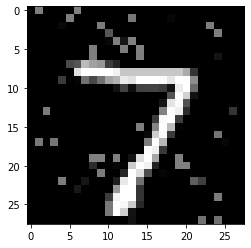

In [15]:
BEST = BEST_X + x_test[0]
plt.imshow(BEST.reshape(28,28),cmap='gray')
plt.show()

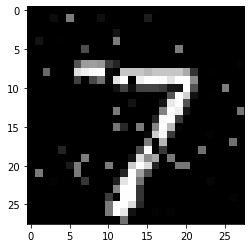

In [14]:
# test
BEST = BEST_X + x_test[0]
plt.imshow(BEST.reshape(28,28),cmap='gray')
plt.show()

In [14]:
result=model.predict(BEST_X.reshape(1,784))
result[0]

array([1.2270408e-04, 4.8461512e-05, 1.4535931e-03, 2.8693033e-03,
       1.9180823e-05, 2.3397243e-04, 9.4624681e-07, 9.9419135e-01,
       9.8625685e-05, 9.6184318e-04], dtype=float32)

In [15]:
# test
count = 0
for i in range(784):
    if BEST_X[i] != 0:
        count+=1
print(count)

80


In [55]:
V=[1.175,0.8,1.5,1.32,1.912]
for i in range(5):
                    if V[i] > 1:
                        V[i] =1-(V[i]-1)
                       
V = [round(i,3) for i in V]
V

[0.825, 0.8, 0.5, 0.68, 0.088]